<a href="https://colab.research.google.com/github/seunghyeon2776/98/blob/master/Resnet(2021_01_30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install dataset

In [9]:
import os
import glob
import numpy as np
import cv2
from sklearn.utils import shuffle

def load_train(train_path, image_size, classes):
    images = []
    labels = []
    ids = []
    cls = []

    print('Reading training images')
    for fld in classes:
        index = classes.index(fld)
        print('Loading {} files (Index: {})'.format(fld, index))
        path = os.path.join(train_path, fld, '*g')
        files = glob.glob(path)
        for fl in files:
            image = cv2.imread(fl)
            image = cv2.resize(image, (image_size, image_size), cv2.INTER_LINEAR)
            images.append(image)
            label = np.zeros(len(classes))
            label[index] = 1.0
            labels.append(label)
            flbase = os.path.basename(fl)
            ids.append(flbase)
            cls.append(fld)
    images = np.array(images)
    labels = np.array(labels)
    ids = np.array(ids)
    cls = np.array(cls)
  

    return images, labels, ids, cls


def load_test(test_path, image_size):
    path = os.path.join(test_path, '*g')
    files = sorted(glob.glob(path))

    X_test = []
    X_test_id = []
    print("Reading test images")
    for fl in files:
        
        img = cv2.imread(fl)
        img = cv2.resize(img, (image_size, image_size), cv2.INTER_LINEAR)
        X_test.append(img)
        X_test_id.append(flbase)
        flbase = os.path.basename(fl)

    X_test = np.array(X_test, dtype=np.uint8)
    X_test = X_test.astype('float32')
    X_test = X_test / 255
    X_test_id = np.array(X_test_id)

    return X_test, X_test_id


class DataSet(object):

    def __init__(self, images, labels, ids, cls):
        """Construct a DataSet. one_hot arg is used only if fake_data is true."""

        self._num_examples = images.shape[0]

        # Convert shape from [num examples, rows, columns, depth]
        # to [num examples, rows*columns] (assuming depth == 1)
        # Convert from [0, 255] -> [0.0, 1.0].

        images = images.astype(np.float32)
        images = np.multiply(images, 1.0 / 255.0)

        self._images = images
        self._labels = labels
        self._ids = ids
        self._cls = cls
        self._epochs_completed = 0
        self._index_in_epoch = 0

    @property
    def images(self):
        return self._images

    @property
    def labels(self):
        return self._labels

    @property
    def ids(self):
        return self._ids

    @property
    def cls(self):
        return self._cls

    @property
    def num_examples(self):
        return self._num_examples

    @property
    def epochs_completed(self):
        return self._epochs_completed

    def next_batch(self, batch_size):
        """Return the next `batch_size` examples from this data set."""
        start = self._index_in_epoch
        self._index_in_epoch += batch_size

        if self._index_in_epoch > self._num_examples:
            # Finished epoch
            self._epochs_completed += 1

            # # Shuffle the data (maybe)
            # perm = np.arange(self._num_examples)
            # np.random.shuffle(perm)
            # self._images = self._images[perm]
            # self._labels = self._labels[perm]
            # Start next epoch

            start = 0
            self._index_in_epoch = batch_size
            assert batch_size <= self._num_examples
        end = self._index_in_epoch

        return self._images[start:end], self._labels[start:end], self._ids[start:end], self._cls[start:end]


def read_train_sets(train_path, image_size, classes, validation_size=0):
    class DataSets(object):
        pass

    data_sets = DataSets()

    images, labels, ids, cls = load_train(train_path, image_size, classes)
    images, labels, ids, cls = shuffle(images, labels, ids, cls)  # shuffle the data

    if isinstance(validation_size, float):
        validation_size = int(validation_size * images.shape[0])

    train_images = images
    train_labels = labels
    train_ids = ids
    train_cls = cls

    data_sets.train = DataSet(train_images, train_labels, train_ids, train_cls)

    return data_sets

In [10]:
def load_validation(validation_path, image_size, classes):
    images2 = []
    labels2 = []
    ids2 = []
    cls2 = []

    print('Reading validation images')
    for fld in classes:
        index = classes.index(fld)
        print('Loading {} files (Index: {})'.format(fld, index))
        path = os.path.join(validation_path, fld, '*g')
        files = glob.glob(path)
        for fl in files:
            image = cv2.imread(fl)
            image = cv2.resize(image, (image_size, image_size), cv2.INTER_LINEAR)
            images2.append(image)
            label = np.zeros(len(classes))
            label[index] = 1.0
            labels2.append(label)
            flbase = os.path.basename(fl)
            ids2.append(flbase)
            cls2.append(fld)
    images2 = np.array(images2)
    labels2 = np.array(labels2)
    ids2 = np.array(ids2)
    cls2 = np.array(cls2)
  

    return images2, labels2, ids2, cls2


def read_validation_sets(validation_path, image_size, classes, validation_size=0):
    class DataSets(object):
        pass

    data_sets = DataSets()

    images2, labels2, ids2, cls2 = load_validation(validation_path, image_size, classes)
    images2, labels2, ids2, cls2 = shuffle(images2, labels2, ids2, cls2)  # shuffle the data

    if isinstance(validation_size, float):
        validation_size = int(validation_size * images2.shape[0])

    validation_images = images2
    validation_labels = labels2
    validation_ids = ids2
    validation_cls = cls2

    data_sets.valid = DataSet(validation_images, validation_labels, validation_ids, validation_cls)

    return data_sets

def load_test(test_path, image_size, classes):
    images3 = []
    labels3 = []
    ids3 = []
    cls3 = []

    print('Reading validation images')
    for fld in classes:
        index = classes.index(fld)
        print('Loading {} files (Index: {})'.format(fld, index))
        path = os.path.join(test_path, fld, '*g')
        files = glob.glob(path)
        for fl in files:
            image = cv2.imread(fl)
            image = cv2.resize(image, (image_size, image_size), cv2.INTER_LINEAR)
            images3.append(image)
            label = np.zeros(len(classes))
            label[index] = 1.0
            labels3.append(label)
            flbase = os.path.basename(fl)
            ids3.append(flbase)
            cls3.append(fld)
    images3 = np.array(images3)
    labels3 = np.array(labels3)
    ids3 = np.array(ids3)
    cls3 = np.array(cls3)
  

    return images3, labels3, ids3, cls3


def read_test_sets(test_path, image_size, classes, validation_size=0):
    class DataSets(object):
        pass

    data_sets = DataSets()

    images3, labels3, ids3, cls3 = load_test(test_path, image_size, classes)
    images3, labels3, ids3, cls3 = shuffle(images3, labels3, ids3, cls3)  # shuffle the data

    if isinstance(validation_size, float):
        validation_size = int(validation_size * images3.shape[0])

    test_images = images3
    test_labels = labels3
    test_ids = ids3
    test_cls = cls3

    data_sets.test = DataSet(test_images, test_labels, test_ids, test_cls)

    return data_sets

In [11]:
import time
import math
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import cv2
import dataset
import os
import keras

from sklearn.metrics import confusion_matrix
from datetime import timedelta
import seaborn as sn

%matplotlib inline

tf.disable_v2_behavior()

filter_size0 = 3
num_filters0 = 3

filter_size1 = 3
num_filters1 = 32

filter_size2 = 3
num_filters2 = 16

filter_size3 = 3
num_filters3 = 32

filter_size4 = 3
num_filters4 = 256

filter_size5 = 3
num_filters5 = 64

filter_size6 = 7
num_filters6 = 256

filter_size7 = 3
num_filters7 = 128

filter_size8 = 3
num_filters8 = 256

# Fully-connected layer.
fc_size = 2048
fc_size2 = 1000    
fc_size3 = 64       

# Number of color channels for the images: 1 channel for gray-scale.
num_channels = 3

# image dimensions (only squares for now)
img_size = 224

# Size of image when flattened to a single dimension
img_size_flat = img_size * img_size * num_channels

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# class info
classes = ['1.Cancer', '2.Precancer', '3.Inflammatory', '4.Normal']
num_classes = len(classes)

# batch size
batch_size = 32

# validation split
validation_size = 0

# how long to wait after validation loss stops improving before terminating training
early_stopping = None

In [12]:
train_path = '/content/drive/Shareddrives/CTRC-OralDetect-Project/HM_Color/train'
validation_path = '/content/drive/Shareddrives/CTRC-OralDetect-Project/HM_Color/validation'
test_path = '/content/drive/Shareddrives/CTRC-OralDetect-Project/HM_Color/test'
checkpoint_dir = '/content/drive/MyDrive/model2/'

data = read_train_sets(train_path, img_size, classes, validation_size=validation_size)
data2 = read_validation_sets(validation_path, img_size, classes, validation_size=validation_size)
data3 = read_test_sets(test_path, img_size, classes, validation_size=validation_size)


print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Validation-set:\t{}".format(len(data2.valid.labels)))
print("- Test-set:\t\t{}".format(len(data3.test.labels)))

Reading training images
Loading 1.Cancer files (Index: 0)
Loading 2.Precancer files (Index: 1)
Loading 3.Inflammatory files (Index: 2)
Loading 4.Normal files (Index: 3)
Reading training images
Loading 1.Cancer files (Index: 0)
Loading 2.Precancer files (Index: 1)
Loading 3.Inflammatory files (Index: 2)
Loading 4.Normal files (Index: 3)
Reading training images
Loading 1.Cancer files (Index: 0)
Loading 2.Precancer files (Index: 1)
Loading 3.Inflammatory files (Index: 2)
Loading 4.Normal files (Index: 3)
Size of:
- Training-set:		2361
- Validation-set:	629
- Test-set:	629


In [13]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

def new_conv_layer_2048(input,              
                   num_input_channels, 
                   filter_size,       
                   num_filters,       
                   use_pooling=False): 

    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_weights(shape=shape)

    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    if use_pooling:

        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)

    return layer, weights



def new_conv_layer_2048_2(input,              
                   num_input_channels, 
                   filter_size,       
                   num_filters,       
                   use_pooling=True): 

    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_weights(shape=shape)

    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    if use_pooling:

        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)

    return layer, weights



def new_conv_layer_1024(input,              
                   num_input_channels, 
                   filter_size,       
                   num_filters,       
                   use_pooling=False): 

    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_weights(shape=shape)

    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases  

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    if use_pooling:

        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)

    return layer, weights



def new_conv_layer_512(input,              
                   num_input_channels, 
                   filter_size,       
                   num_filters,       
                   use_pooling=False): 

    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_weights(shape=shape)

    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases 

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases    

    if use_pooling:

        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)

    return layer, weights



def new_conv_layer_256(input,              
                   num_input_channels, 
                   filter_size,       
                   num_filters,       
                   use_pooling=False): 

    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_weights(shape=shape)

    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases  

    if use_pooling:

        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)

    return layer, weights



def new_conv_layer_128(input,              
                   num_input_channels, 
                   filter_size,       
                   num_filters,       
                   use_pooling=False): 

    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_weights(shape=shape)

    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases  

    if use_pooling:

        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)

    return layer, weights




def flatten_layer(layer):

    layer_shape = layer.get_shape()

    num_features = layer_shape[1:50].num_elements()
    
    layer_flat = tf.reshape(layer, [-1, num_features])

    return layer_flat, num_features





def new_fc_layer(input,        
                 num_inputs,    
                 num_outputs,  
                 use_relu=True):

    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    layer = tf.matmul(input, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)
                
    return layer


def new_fc_layer2(input,        
                 num_inputs,    
                 num_outputs,  
                 use_relu=True):

    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    layer = tf.matmul(input, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)
        layer = tf.nn.dropout(layer, keep_prob=keep_prob)
                
    return layer

x = tf.compat.v1.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])


y_true = tf.compat.v1.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

y_true_cls = tf.argmax(y_true, axis=1)

keep_prob = tf.compat.v1.placeholder(tf.float32)

In [14]:
layer_conv1, weights_conv1 = \
    new_conv_layer_2048(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size8,
                   num_filters=num_filters8,
                   use_pooling=False)
     
layer_conv2, weights_conv2 = \
    new_conv_layer_2048_2(input=layer_conv1,
                   num_input_channels=num_filters8,
                   filter_size=filter_size8,
                   num_filters=num_filters8,
                   use_pooling=True)
    
layer_conv3, weights_conv3 = \
    new_conv_layer_1024(input=layer_conv2,
                   num_input_channels=num_filters8,
                   filter_size=filter_size7,
                   num_filters=num_filters7,
                   use_pooling=False)

    
layer_conv4, weights_conv4 = \
    new_conv_layer_512(input=layer_conv3,
                   num_input_channels=num_filters7,
                   filter_size=filter_size5,
                   num_filters=num_filters5,
                   use_pooling=False)

    
layer_conv5, weights_conv5 = \
    new_conv_layer_256(input=layer_conv4,
                   num_input_channels=num_filters5,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=False)
    
    
layer_conv6, weights_conv6 = \
    new_conv_layer_128(input=layer_conv5,
                   num_input_channels=num_filters3,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=False)
    

    
layer_flat, num_features = flatten_layer(layer_conv6)

layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=64,
                         use_relu=True)

layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=64,
                         num_outputs=4,
                         use_relu=True)



y_pred = tf.nn.softmax(layer_fc2)

y_pred_cls = tf.argmax(y_pred, axis=1)

loss_func = tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer_fc2, labels=y_true)

cost = tf.reduce_mean(loss_func)

regularizer = tf.nn.l2_loss(weights_conv6)
beta = 0.001
cost = tf.reduce_mean(cost + beta*regularizer)

optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
session = tf.Session()

session.run(tf.global_variables_initializer())

train_batch_size = batch_size

def print_progress(epoch, feed_dict_train, val_loss):
    acc = session.run(accuracy, feed_dict=feed_dict_train)
    msg = "Epoch {0} --- Training Accuracy: {1:>6.1%},  Validation Loss: {2:.3f}"
    print(msg.format(epoch + 1, acc, val_loss))

    if epoch <= 48:
      print(print_validation_accuracy(show_confusion_matrix=True))
      print(print_test_accuracy(show_confusion_matrix=True))
    else:
      print(print_validation_accuracy(show_confusion_matrix=True))
      print(print_test_accuracy(show_confusion_matrix=True))


total_iterations = 0


In [ ]:
def optimize(num_iterations):
    global total_iterations
    

    start_time = time.time()
    
    best_val_loss = float("inf")
    patience = 0

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        

        x_batch, y_true_batch, _, cls_batch = data.train.next_batch(train_batch_size)
        x_valid_batch, y_valid_batch, _, valid_cls_batch = data2.valid.next_batch(train_batch_size)
        x_test_batch, y_test_batch, _, test_cls_batch = data3.test.next_batch(train_batch_size)

        x_batch = x_batch.reshape(train_batch_size, img_size_flat)
        x_valid_batch = x_valid_batch.reshape(train_batch_size, img_size_flat)
        x_test_batch = x_test_batch.reshape(train_batch_size, img_size_flat)

        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        
        feed_dict_validate = {x: x_valid_batch,
                              y_true: y_valid_batch}

        feed_dict_test = {x: x_test_batch,
                          y_true: y_test_batch}

        session.run(optimizer, feed_dict=feed_dict_train)
        
        if i % int(data.train.num_examples/batch_size) == 0: 
            val_loss = session.run(cost, feed_dict=feed_dict_validate)
            epoch = int(i / int(data.train.num_examples/batch_size))

            print_progress(epoch, feed_dict_train, val_loss)
            
            if early_stopping:    
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience = 0
                else:
                    patience += 1

                if patience == early_stopping:
                    break


    total_iterations += num_iterations

    end_time = time.time()

    time_dif = end_time - start_time

    print("Time elapsed: " + str(timedelta(seconds=int(round(time_dif)))))

In [ ]:
def print_validation_accuracy(show_example_errors=False, show_confusion_matrix=False):

    num_test = len(data2.valid.images)

    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    i = 0

    while i < num_test:
 
        j = min(i + batch_size, num_test)

        images = data2.valid.images[i:j, :].reshape(-1, img_size_flat)
        
        labels = data2.valid.labels[i:j, :]

        feed_dict = {x: images, y_true: labels}

        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        i = j


    cls_true = np.array(data2.valid.cls)
    cls_pred = np.array([classes[x] for x in cls_pred])

 

    correct = (cls_true == cls_pred)

    correct_sum = correct.sum()

    acc = float(correct_sum) / num_test

    msg = "Validation Accuracy: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

def print_test_accuracy(show_example_errors=False, show_confusion_matrix=False):

    num_test2 = len(data3.test.images)

    cls_pred2 = np.zeros(shape=num_test2, dtype=np.int)

    i = 0

    while i < num_test2:
 
        j = min(i + batch_size, num_test2)

        images = data3.test.images[i:j, :].reshape(-1, img_size_flat)
        
        labels = data3.test.labels[i:j, :]

        feed_dict = {x: images, y_true: labels}

        cls_pred2[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        i = j


    cls_true2 = np.array(data3.test.cls)
    cls_pred2 = np.array([classes[x] for x in cls_pred2])

 

    correct = (cls_true2 == cls_pred2)

    correct_sum = correct.sum()

    acc = float(correct_sum) / num_test2

    msg = "Test Accuracy: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test2))

    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred2=cls_pred2, correct=correct)

    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix2(cls_pred2=cls_pred2)


def plot_confusion_matrix(cls_pred):
    
    cls_true = data2.valid.cls

    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    print(cm)
    
    plt.matshow(cm, cmap=plt.cm.Wistia_r)

    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.grid(False)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(0,4):
      for j in range(0,4):
        plt.text(j,i,str(cm[i][j]))
    plt.show()

    print("1.Cancer의 정밀도 : ", (cm[0,0]/(cm[0,0]+cm[1,0]+cm[2,0]+cm[3,0]))*100, "%")
    print("1.Cancer의 재현율 : ", (cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]))*100, "%")
    print("2.Precancer의 정밀도 : ", (cm[1,1]/(cm[0,1]+cm[1,1]+cm[2,1]+cm[3,1]))*100, "%")
    print("2.Precancer의 재현율 : ", (cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]))*100, "%")
    print("3.Inflammatory의 정밀도 : ", (cm[2,2]/(cm[0,2]+cm[1,2]+cm[2,2]+cm[3,2]))*100, "%")
    print("3.Inflammatory의 재현율 : ", (cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]))*100, "%")
    print("4.Normal의 정밀도 : ", (cm[3,3]/(cm[0,3]+cm[1,3]+cm[2,3]+cm[3,3]))*100, "%")
    print("4.Normal의 재현율 : ", (cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]))*100, "%")


def plot_confusion_matrix2(cls_pred2):
    
    cls_true2 = data3.test.cls

    cm = confusion_matrix(y_true=cls_true2, y_pred=cls_pred2)
    
    print(cm)
    
    plt.matshow(cm, cmap=plt.cm.Wistia_r)

    plt.colorbar()
    
    plt.title('Test Confusion Matrix')
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.grid(False)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(0,4):
      for j in range(0,4):
        plt.text(j,i,str(cm[i][j]))
    plt.show()

    print("1.Cancer의 정밀도 : ", (cm[0,0]/(cm[0,0]+cm[1,0]+cm[2,0]+cm[3,0]))*100, "%")
    print("1.Cancer의 재현율 : ", (cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]))*100, "%")
    print("2.Precancer의 정밀도 : ", (cm[1,1]/(cm[0,1]+cm[1,1]+cm[2,1]+cm[3,1]))*100, "%")
    print("2.Precancer의 재현율 : ", (cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]))*100, "%")
    print("3.Inflammatory의 정밀도 : ", (cm[2,2]/(cm[0,2]+cm[1,2]+cm[2,2]+cm[3,2]))*100, "%")
    print("3.Inflammatory의 재현율 : ", (cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]))*100, "%")
    print("4.Normal의 정밀도 : ", (cm[3,3]/(cm[0,3]+cm[1,3]+cm[2,3]+cm[3,3]))*100, "%")
    print("4.Normal의 재현율 : ", (cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]))*100, "%")

Epoch 1 --- Training Accuracy:  34.4%,  Validation Loss: 1.376
Accuracy on Set: 43.7% (275 / 629)
Confusion Matrix:
[[  2   0  48  93]
 [  1   0  21  30]
 [  2   0  25  66]
 [  8   0  85 248]]


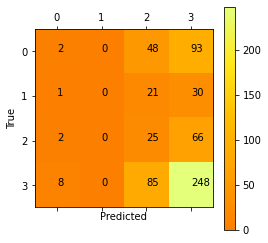

1.Cancer의 정밀도 :  15.384615384615385 %
1.Cancer의 재현율 :  1.3986013986013985 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  13.966480446927374 %
3.Inflammatory의 재현율 :  26.881720430107524 %
4.Normal의 정밀도 :  56.75057208237986 %
4.Normal의 재현율 :  72.72727272727273 %
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: invalid value encountered in long_scalars


Accuracy on Set: 42.3% (266 / 629)
Confusion Matrix:
[[  3   1  28 111]
 [  2   0  14  36]
 [  1   0  17  75]
 [  6   1  88 246]]


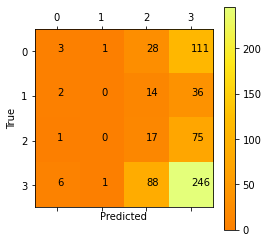

1.Cancer의 정밀도 :  25.0 %
1.Cancer의 재현율 :  2.097902097902098 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  11.564625850340136 %
3.Inflammatory의 재현율 :  18.27956989247312 %
4.Normal의 정밀도 :  52.56410256410257 %
4.Normal의 재현율 :  72.14076246334311 %
None
Epoch 2 --- Training Accuracy:  46.9%,  Validation Loss: 1.190
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


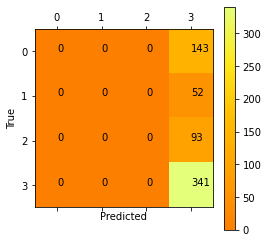

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:214: RuntimeWarning: invalid value encountered in long_scalars


Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


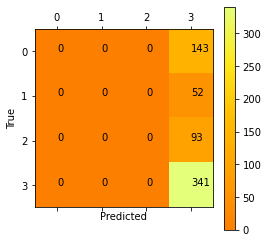

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:242: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:246: RuntimeWarning: invalid value encountered in long_scalars


Epoch 3 --- Training Accuracy:  46.9%,  Validation Loss: 1.056
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


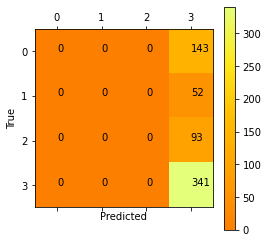

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


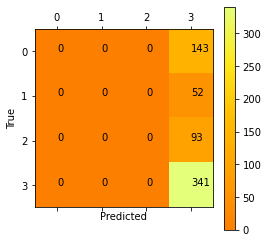

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Epoch 4 --- Training Accuracy:  46.9%,  Validation Loss: 1.288
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


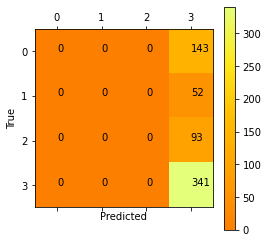

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


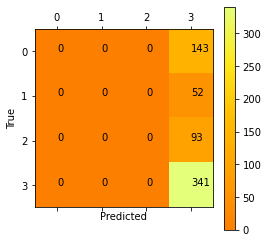

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Epoch 5 --- Training Accuracy:  46.9%,  Validation Loss: 1.348
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


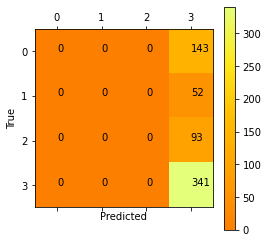

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


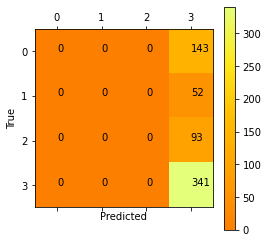

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Epoch 6 --- Training Accuracy:  46.9%,  Validation Loss: 1.056
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


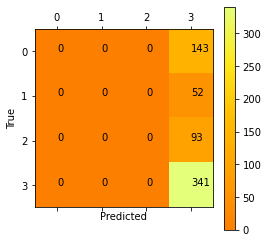

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


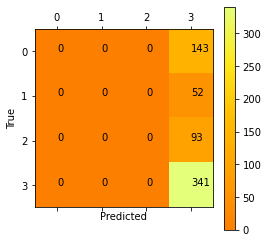

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Epoch 7 --- Training Accuracy:  46.9%,  Validation Loss: 1.111
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


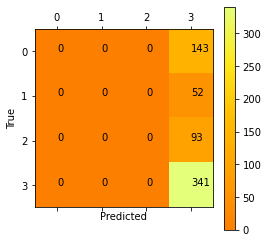

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


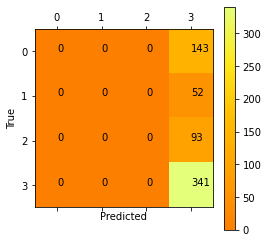

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Epoch 8 --- Training Accuracy:  46.9%,  Validation Loss: 1.007
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


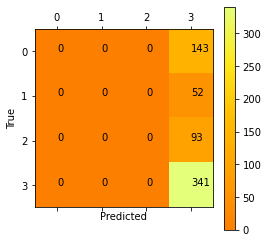

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


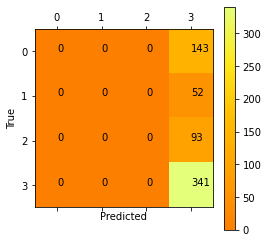

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Epoch 9 --- Training Accuracy:  46.9%,  Validation Loss: 1.077
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


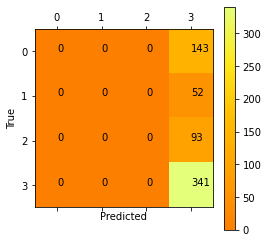

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


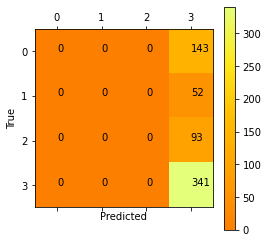

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Epoch 10 --- Training Accuracy:  46.9%,  Validation Loss: 0.892
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


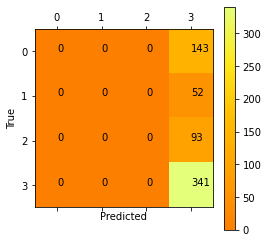

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  0   0   0  93]
 [  0   0   0 341]]


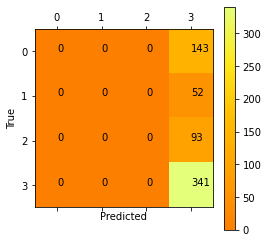

1.Cancer의 정밀도 :  nan %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.213036565977745 %
4.Normal의 재현율 :  100.0 %
None
Epoch 11 --- Training Accuracy:  46.9%,  Validation Loss: 0.796
Accuracy on Set: 54.2% (341 / 629)
Confusion Matrix:
[[  0   0   0 143]
 [  0   0   0  52]
 [  2   0   0  91]
 [  0   0   0 341]]


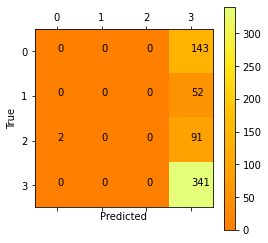

1.Cancer의 정밀도 :  0.0 %
1.Cancer의 재현율 :  0.0 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.385964912280706 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 54.4% (342 / 629)
Confusion Matrix:
[[  1   0   0 142]
 [  0   0   0  52]
 [  3   0   0  90]
 [  0   0   0 341]]


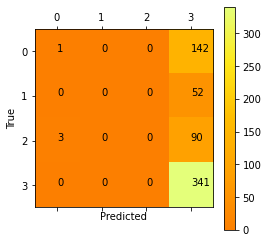

1.Cancer의 정밀도 :  25.0 %
1.Cancer의 재현율 :  0.6993006993006993 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  54.559999999999995 %
4.Normal의 재현율 :  100.0 %
None
Epoch 12 --- Training Accuracy:  50.0%,  Validation Loss: 1.065
Accuracy on Set: 56.8% (357 / 629)
Confusion Matrix:
[[ 17   0   0 126]
 [  1   0   0  51]
 [ 11   0   0  82]
 [  1   0   0 340]]


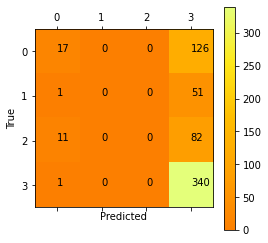

1.Cancer의 정밀도 :  56.666666666666664 %
1.Cancer의 재현율 :  11.888111888111888 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  56.761268781302164 %
4.Normal의 재현율 :  99.70674486803519 %
None
Accuracy on Set: 56.0% (352 / 629)
Confusion Matrix:
[[ 19   0   0 124]
 [  5   0   0  47]
 [ 16   0   0  77]
 [  8   0   0 333]]


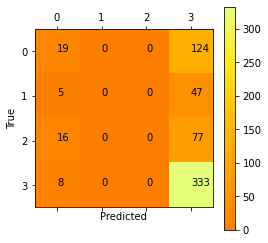

1.Cancer의 정밀도 :  39.58333333333333 %
1.Cancer의 재현율 :  13.286713286713287 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  57.31497418244407 %
4.Normal의 재현율 :  97.65395894428153 %
None
Epoch 13 --- Training Accuracy:  56.2%,  Validation Loss: 1.075
Accuracy on Set: 56.0% (352 / 629)
Confusion Matrix:
[[ 12   0   0 131]
 [  1   0   0  51]
 [  7   0   0  86]
 [  1   0   0 340]]


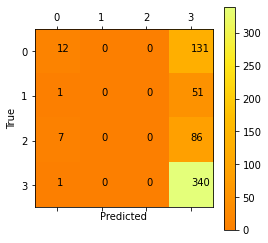

1.Cancer의 정밀도 :  57.14285714285714 %
1.Cancer의 재현율 :  8.391608391608392 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  55.92105263157895 %
4.Normal의 재현율 :  99.70674486803519 %
None
Accuracy on Set: 55.6% (350 / 629)
Confusion Matrix:
[[ 12   0   0 131]
 [  3   0   0  49]
 [ 14   0   0  79]
 [  3   0   0 338]]


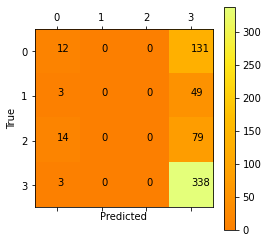

1.Cancer의 정밀도 :  37.5 %
1.Cancer의 재현율 :  8.391608391608392 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  56.61641541038526 %
4.Normal의 재현율 :  99.12023460410558 %
None
Epoch 14 --- Training Accuracy:  56.2%,  Validation Loss: 1.049
Accuracy on Set: 57.9% (364 / 629)
Confusion Matrix:
[[ 23   0   0 120]
 [  3   0   0  49]
 [  5   0   0  88]
 [  0   0   0 341]]


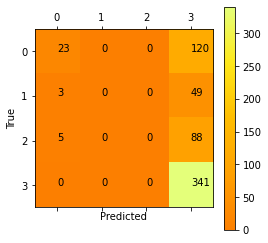

1.Cancer의 정밀도 :  74.19354838709677 %
1.Cancer의 재현율 :  16.083916083916083 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  57.02341137123745 %
4.Normal의 재현율 :  100.0 %
None
Accuracy on Set: 56.6% (356 / 629)
Confusion Matrix:
[[ 22   0   0 121]
 [  3   0   0  49]
 [ 17   0   0  76]
 [  7   0   0 334]]


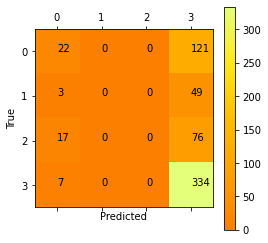

1.Cancer의 정밀도 :  44.89795918367347 %
1.Cancer의 재현율 :  15.384615384615385 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  57.58620689655173 %
4.Normal의 재현율 :  97.94721407624634 %
None
Epoch 15 --- Training Accuracy:  62.5%,  Validation Loss: 1.203
Accuracy on Set: 57.1% (359 / 629)
Confusion Matrix:
[[ 22   0   0 121]
 [  4   0   0  48]
 [  7   0   0  86]
 [  4   0   0 337]]


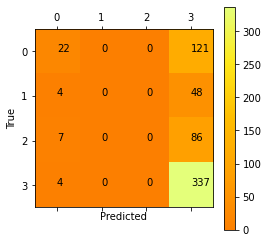

1.Cancer의 정밀도 :  59.45945945945946 %
1.Cancer의 재현율 :  15.384615384615385 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  56.92567567567568 %
4.Normal의 재현율 :  98.82697947214076 %
None
Accuracy on Set: 57.2% (360 / 629)
Confusion Matrix:
[[ 25   0   0 118]
 [  4   0   0  48]
 [ 17   0   0  76]
 [  6   0   0 335]]


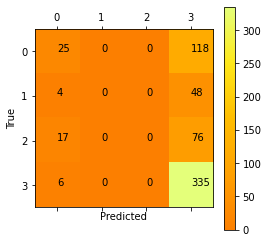

1.Cancer의 정밀도 :  48.07692307692308 %
1.Cancer의 재현율 :  17.482517482517483 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  58.05892547660312 %
4.Normal의 재현율 :  98.24046920821115 %
None
Epoch 16 --- Training Accuracy:  50.0%,  Validation Loss: 0.715
Accuracy on Set: 60.6% (381 / 629)
Confusion Matrix:
[[ 53   0   0  90]
 [ 10   0   0  42]
 [ 16   0   0  77]
 [ 13   0   0 328]]


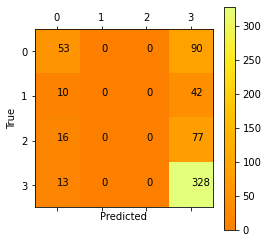

1.Cancer의 정밀도 :  57.608695652173914 %
1.Cancer의 재현율 :  37.06293706293706 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  61.08007448789572 %
4.Normal의 재현율 :  96.18768328445748 %
None
Accuracy on Set: 59.3% (373 / 629)
Confusion Matrix:
[[ 48   0   0  95]
 [  8   0   0  44]
 [ 32   0   0  61]
 [ 16   0   0 325]]


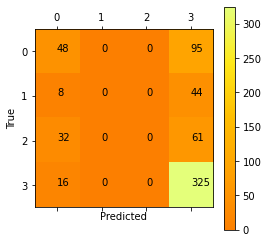

1.Cancer의 정밀도 :  46.15384615384615 %
1.Cancer의 재현율 :  33.56643356643357 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  61.904761904761905 %
4.Normal의 재현율 :  95.30791788856305 %
None
Epoch 17 --- Training Accuracy:  65.6%,  Validation Loss: 0.992
Accuracy on Set: 60.3% (379 / 629)
Confusion Matrix:
[[ 51   0   0  92]
 [ 11   0   0  41]
 [ 13   0   0  80]
 [ 13   0   0 328]]


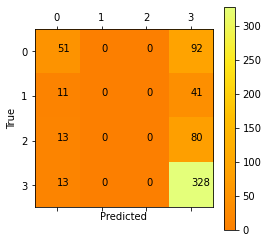

1.Cancer의 정밀도 :  57.95454545454546 %
1.Cancer의 재현율 :  35.66433566433567 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  60.62846580406654 %
4.Normal의 재현율 :  96.18768328445748 %
None
Accuracy on Set: 59.1% (372 / 629)
Confusion Matrix:
[[ 49   0   0  94]
 [  7   0   0  45]
 [ 27   0   0  66]
 [ 18   0   0 323]]


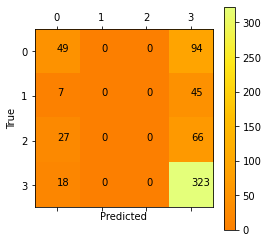

1.Cancer의 정밀도 :  48.51485148514851 %
1.Cancer의 재현율 :  34.26573426573427 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  61.17424242424242 %
4.Normal의 재현율 :  94.72140762463343 %
None
Epoch 18 --- Training Accuracy:  59.4%,  Validation Loss: 0.858
Accuracy on Set: 61.4% (386 / 629)
Confusion Matrix:
[[ 55   0   0  88]
 [ 10   0   0  42]
 [ 11   0   0  82]
 [ 10   0   0 331]]


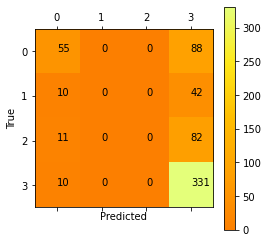

1.Cancer의 정밀도 :  63.95348837209303 %
1.Cancer의 재현율 :  38.46153846153847 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  60.957642725598525 %
4.Normal의 재현율 :  97.0674486803519 %
None
Accuracy on Set: 59.3% (373 / 629)
Confusion Matrix:
[[ 51   0   0  92]
 [  8   0   0  44]
 [ 31   0   0  62]
 [ 19   0   0 322]]


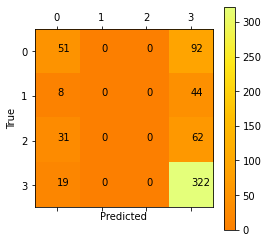

1.Cancer의 정밀도 :  46.788990825688074 %
1.Cancer의 재현율 :  35.66433566433567 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  61.92307692307693 %
4.Normal의 재현율 :  94.42815249266863 %
None
Epoch 19 --- Training Accuracy:  62.5%,  Validation Loss: 1.078
Accuracy on Set: 61.0% (384 / 629)
Confusion Matrix:
[[ 58   0   0  85]
 [ 10   0   0  42]
 [ 10   0   0  83]
 [ 15   0   0 326]]


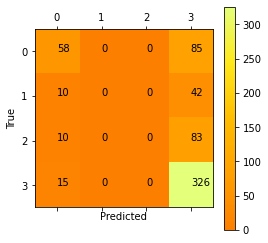

1.Cancer의 정밀도 :  62.365591397849464 %
1.Cancer의 재현율 :  40.55944055944056 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  60.820895522388064 %
4.Normal의 재현율 :  95.60117302052787 %
None
Accuracy on Set: 59.5% (374 / 629)
Confusion Matrix:
[[ 55   0   0  88]
 [  8   0   0  44]
 [ 25   0   0  68]
 [ 22   0   0 319]]


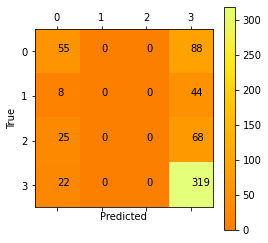

1.Cancer의 정밀도 :  50.0 %
1.Cancer의 재현율 :  38.46153846153847 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  61.46435452793835 %
4.Normal의 재현율 :  93.54838709677419 %
None
Epoch 20 --- Training Accuracy:  59.4%,  Validation Loss: 1.225
Accuracy on Set: 63.0% (396 / 629)
Confusion Matrix:
[[ 75   0   0  68]
 [ 16   0   0  36]
 [ 14   0   0  79]
 [ 20   0   0 321]]


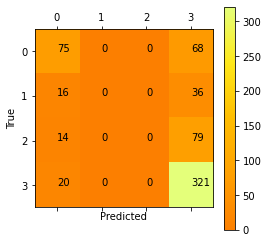

1.Cancer의 정밀도 :  60.0 %
1.Cancer의 재현율 :  52.44755244755245 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  63.69047619047619 %
4.Normal의 재현율 :  94.13489736070382 %
None
Accuracy on Set: 60.7% (382 / 629)
Confusion Matrix:
[[ 68   0   0  75]
 [ 12   0   0  40]
 [ 32   0   0  61]
 [ 27   0   0 314]]


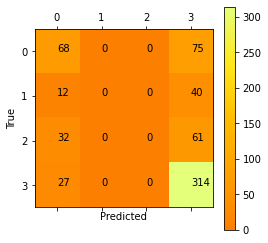

1.Cancer의 정밀도 :  48.92086330935252 %
1.Cancer의 재현율 :  47.55244755244755 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  64.08163265306122 %
4.Normal의 재현율 :  92.08211143695014 %
None
Epoch 21 --- Training Accuracy:  56.2%,  Validation Loss: 0.866
Accuracy on Set: 63.0% (396 / 629)
Confusion Matrix:
[[ 75   0   0  68]
 [ 15   0   0  37]
 [ 16   0   0  77]
 [ 20   0   0 321]]


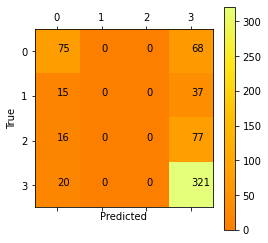

1.Cancer의 정밀도 :  59.523809523809526 %
1.Cancer의 재현율 :  52.44755244755245 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  63.817097415506964 %
4.Normal의 재현율 :  94.13489736070382 %
None
Accuracy on Set: 60.6% (381 / 629)
Confusion Matrix:
[[ 72   0   0  71]
 [ 15   0   0  37]
 [ 26   0   1  66]
 [ 33   0   0 308]]


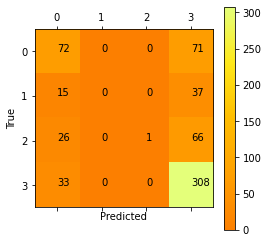

1.Cancer의 정밀도 :  49.31506849315068 %
1.Cancer의 재현율 :  50.349650349650354 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  100.0 %
3.Inflammatory의 재현율 :  1.0752688172043012 %
4.Normal의 정밀도 :  63.90041493775933 %
4.Normal의 재현율 :  90.32258064516128 %
None
Epoch 22 --- Training Accuracy:  53.1%,  Validation Loss: 0.723
Accuracy on Set: 63.9% (402 / 629)
Confusion Matrix:
[[ 79   0   0  64]
 [ 16   0   0  36]
 [ 17   0   0  76]
 [ 18   0   0 323]]


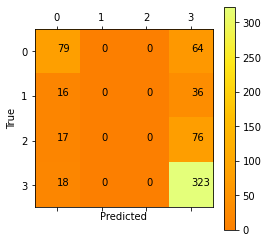

1.Cancer의 정밀도 :  60.76923076923077 %
1.Cancer의 재현율 :  55.24475524475524 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  nan %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  64.72945891783567 %
4.Normal의 재현율 :  94.72140762463343 %
None
Accuracy on Set: 59.5% (374 / 629)
Confusion Matrix:
[[ 67   0   0  76]
 [ 16   0   0  36]
 [ 34   0   1  58]
 [ 35   0   0 306]]


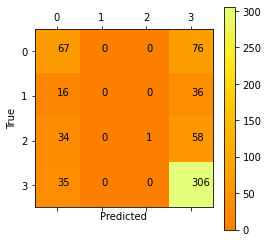

1.Cancer의 정밀도 :  44.07894736842105 %
1.Cancer의 재현율 :  46.85314685314685 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  100.0 %
3.Inflammatory의 재현율 :  1.0752688172043012 %
4.Normal의 정밀도 :  64.28571428571429 %
4.Normal의 재현율 :  89.73607038123167 %
None
Epoch 23 --- Training Accuracy:  62.5%,  Validation Loss: 1.087
Accuracy on Set: 62.5% (393 / 629)
Confusion Matrix:
[[ 65   0   1  77]
 [ 13   0   0  39]
 [ 11   0   1  81]
 [ 14   0   0 327]]


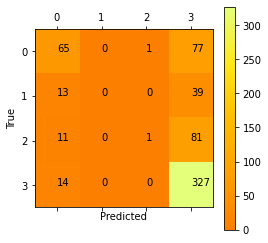

1.Cancer의 정밀도 :  63.10679611650486 %
1.Cancer의 재현율 :  45.45454545454545 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  50.0 %
3.Inflammatory의 재현율 :  1.0752688172043012 %
4.Normal의 정밀도 :  62.40458015267175 %
4.Normal의 재현율 :  95.89442815249268 %
None
Accuracy on Set: 61.4% (386 / 629)
Confusion Matrix:
[[ 61   0   0  82]
 [ 16   0   0  36]
 [ 21   0   2  70]
 [ 18   0   0 323]]


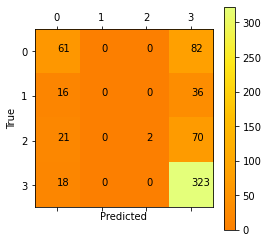

1.Cancer의 정밀도 :  52.58620689655172 %
1.Cancer의 재현율 :  42.65734265734265 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  100.0 %
3.Inflammatory의 재현율 :  2.1505376344086025 %
4.Normal의 정밀도 :  63.20939334637965 %
4.Normal의 재현율 :  94.72140762463343 %
None
Epoch 24 --- Training Accuracy:  59.4%,  Validation Loss: 1.003
Accuracy on Set: 64.5% (406 / 629)
Confusion Matrix:
[[ 84   0   0  59]
 [ 18   0   0  34]
 [ 21   0   1  71]
 [ 20   0   0 321]]


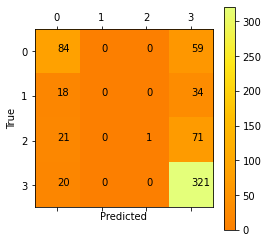

1.Cancer의 정밀도 :  58.74125874125874 %
1.Cancer의 재현율 :  58.74125874125874 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  100.0 %
3.Inflammatory의 재현율 :  1.0752688172043012 %
4.Normal의 정밀도 :  66.18556701030927 %
4.Normal의 재현율 :  94.13489736070382 %
None
Accuracy on Set: 61.0% (384 / 629)
Confusion Matrix:
[[ 78   0   0  65]
 [ 20   0   0  32]
 [ 38   0   1  54]
 [ 36   0   0 305]]


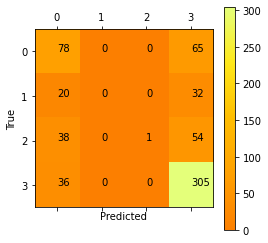

1.Cancer의 정밀도 :  45.348837209302324 %
1.Cancer의 재현율 :  54.54545454545454 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  100.0 %
3.Inflammatory의 재현율 :  1.0752688172043012 %
4.Normal의 정밀도 :  66.8859649122807 %
4.Normal의 재현율 :  89.44281524926686 %
None
Epoch 25 --- Training Accuracy:  56.2%,  Validation Loss: 0.760
Accuracy on Set: 64.4% (405 / 629)
Confusion Matrix:
[[ 81   0   1  61]
 [ 19   0   0  33]
 [ 16   0   2  75]
 [ 19   0   0 322]]


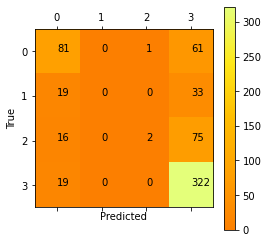

1.Cancer의 정밀도 :  60.0 %
1.Cancer의 재현율 :  56.64335664335665 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  66.66666666666666 %
3.Inflammatory의 재현율 :  2.1505376344086025 %
4.Normal의 정밀도 :  65.58044806517312 %
4.Normal의 재현율 :  94.42815249266863 %
None
Accuracy on Set: 60.9% (383 / 629)
Confusion Matrix:
[[ 79   0   0  64]
 [ 17   0   0  35]
 [ 28   0   0  65]
 [ 35   0   2 304]]


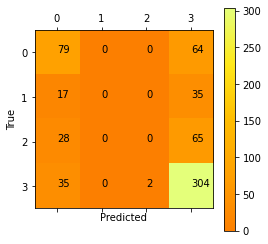

1.Cancer의 정밀도 :  49.685534591194966 %
1.Cancer의 재현율 :  55.24475524475524 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  0.0 %
3.Inflammatory의 재현율 :  0.0 %
4.Normal의 정밀도 :  64.95726495726495 %
4.Normal의 재현율 :  89.14956011730204 %
None
Epoch 26 --- Training Accuracy:  59.4%,  Validation Loss: 0.758
Accuracy on Set: 64.7% (407 / 629)
Confusion Matrix:
[[ 82   0   2  59]
 [ 19   0   0  33]
 [ 18   0   3  72]
 [ 19   0   0 322]]


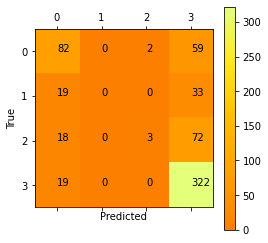

1.Cancer의 정밀도 :  59.42028985507246 %
1.Cancer의 재현율 :  57.34265734265735 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  60.0 %
3.Inflammatory의 재현율 :  3.225806451612903 %
4.Normal의 정밀도 :  66.2551440329218 %
4.Normal의 재현율 :  94.42815249266863 %
None
Accuracy on Set: 61.7% (388 / 629)
Confusion Matrix:
[[ 78   0   1  64]
 [ 20   0   1  31]
 [ 27   0   4  62]
 [ 33   0   2 306]]


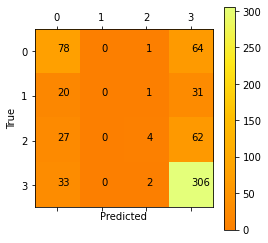

1.Cancer의 정밀도 :  49.36708860759494 %
1.Cancer의 재현율 :  54.54545454545454 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  50.0 %
3.Inflammatory의 재현율 :  4.301075268817205 %
4.Normal의 정밀도 :  66.09071274298056 %
4.Normal의 재현율 :  89.73607038123167 %
None
Epoch 27 --- Training Accuracy:  62.5%,  Validation Loss: 0.783
Accuracy on Set: 64.7% (407 / 629)
Confusion Matrix:
[[ 77   0   4  62]
 [ 16   0   0  36]
 [ 13   0   3  77]
 [ 14   0   0 327]]


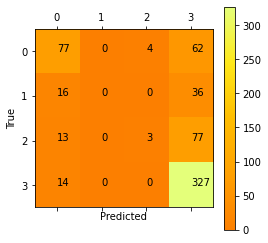

1.Cancer의 정밀도 :  64.16666666666667 %
1.Cancer의 재현율 :  53.84615384615385 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  42.857142857142854 %
3.Inflammatory의 재현율 :  3.225806451612903 %
4.Normal의 정밀도 :  65.13944223107569 %
4.Normal의 재현율 :  95.89442815249268 %
None
Accuracy on Set: 62.0% (390 / 629)
Confusion Matrix:
[[ 73   0   1  69]
 [ 17   0   0  35]
 [ 29   0   3  61]
 [ 24   0   3 314]]


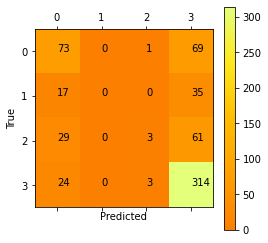

1.Cancer의 정밀도 :  51.048951048951054 %
1.Cancer의 재현율 :  51.048951048951054 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  42.857142857142854 %
3.Inflammatory의 재현율 :  3.225806451612903 %
4.Normal의 정밀도 :  65.55323590814196 %
4.Normal의 재현율 :  92.08211143695014 %
None
Epoch 28 --- Training Accuracy:  65.6%,  Validation Loss: 0.867
Accuracy on Set: 65.3% (411 / 629)
Confusion Matrix:
[[ 82   0   3  58]
 [ 18   0   0  34]
 [ 18   0   2  73]
 [ 14   0   0 327]]


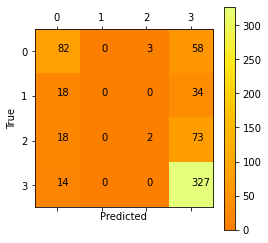

1.Cancer의 정밀도 :  62.121212121212125 %
1.Cancer의 재현율 :  57.34265734265735 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  40.0 %
3.Inflammatory의 재현율 :  2.1505376344086025 %
4.Normal의 정밀도 :  66.46341463414635 %
4.Normal의 재현율 :  95.89442815249268 %
None
Accuracy on Set: 60.9% (383 / 629)
Confusion Matrix:
[[ 69   0   2  72]
 [ 19   0   0  33]
 [ 31   0   3  59]
 [ 29   0   1 311]]


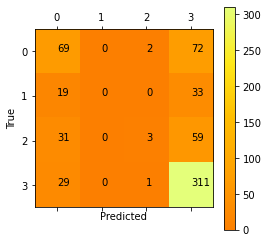

1.Cancer의 정밀도 :  46.62162162162162 %
1.Cancer의 재현율 :  48.25174825174825 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  50.0 %
3.Inflammatory의 재현율 :  3.225806451612903 %
4.Normal의 정밀도 :  65.47368421052632 %
4.Normal의 재현율 :  91.20234604105572 %
None
Epoch 29 --- Training Accuracy:  59.4%,  Validation Loss: 0.740
Accuracy on Set: 63.1% (397 / 629)
Confusion Matrix:
[[ 65   0   3  75]
 [ 14   0   0  38]
 [ 11   0   2  80]
 [ 11   0   0 330]]


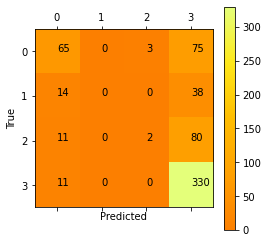

1.Cancer의 정밀도 :  64.35643564356435 %
1.Cancer의 재현율 :  45.45454545454545 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  40.0 %
3.Inflammatory의 재현율 :  2.1505376344086025 %
4.Normal의 정밀도 :  63.09751434034416 %
4.Normal의 재현율 :  96.7741935483871 %
None
Accuracy on Set: 61.8% (389 / 629)
Confusion Matrix:
[[ 64   0   0  79]
 [ 16   0   0  36]
 [ 21   0   3  69]
 [ 15   0   4 322]]


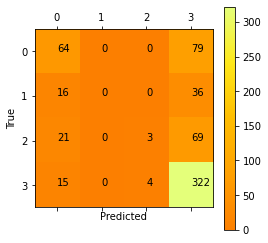

1.Cancer의 정밀도 :  55.172413793103445 %
1.Cancer의 재현율 :  44.75524475524475 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  42.857142857142854 %
3.Inflammatory의 재현율 :  3.225806451612903 %
4.Normal의 정밀도 :  63.63636363636363 %
4.Normal의 재현율 :  94.42815249266863 %
None
Epoch 30 --- Training Accuracy:  65.6%,  Validation Loss: 0.661
Accuracy on Set: 64.1% (403 / 629)
Confusion Matrix:
[[ 67   0   2  74]
 [ 12   0   0  40]
 [ 16   0   4  73]
 [  9   0   0 332]]


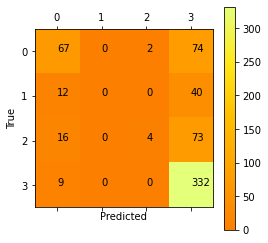

1.Cancer의 정밀도 :  64.42307692307693 %
1.Cancer의 재현율 :  46.85314685314685 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  66.66666666666666 %
3.Inflammatory의 재현율 :  4.301075268817205 %
4.Normal의 정밀도 :  63.969171483622354 %
4.Normal의 재현율 :  97.36070381231671 %
None
Accuracy on Set: 61.4% (386 / 629)
Confusion Matrix:
[[ 63   0   3  77]
 [ 17   0   0  35]
 [ 22   0   5  66]
 [ 20   0   3 318]]


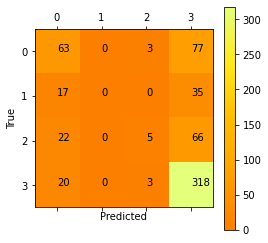

1.Cancer의 정밀도 :  51.63934426229508 %
1.Cancer의 재현율 :  44.05594405594406 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  45.45454545454545 %
3.Inflammatory의 재현율 :  5.376344086021505 %
4.Normal의 정밀도 :  64.11290322580645 %
4.Normal의 재현율 :  93.25513196480938 %
None
Epoch 31 --- Training Accuracy:  71.9%,  Validation Loss: 0.971
Accuracy on Set: 63.8% (401 / 629)
Confusion Matrix:
[[ 60   0   2  81]
 [  9   0   0  43]
 [  7   0   2  84]
 [  2   0   0 339]]


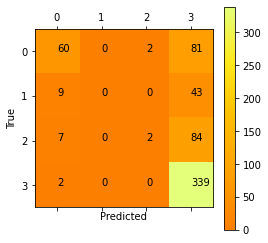

1.Cancer의 정밀도 :  76.92307692307693 %
1.Cancer의 재현율 :  41.95804195804196 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  50.0 %
3.Inflammatory의 재현율 :  2.1505376344086025 %
4.Normal의 정밀도 :  61.97440585009141 %
4.Normal의 재현율 :  99.41348973607037 %
None
Accuracy on Set: 61.0% (384 / 629)
Confusion Matrix:
[[ 52   0   2  89]
 [ 12   0   0  40]
 [ 18   0   3  72]
 [ 11   0   1 329]]


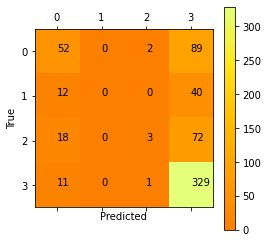

1.Cancer의 정밀도 :  55.91397849462365 %
1.Cancer의 재현율 :  36.36363636363637 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  50.0 %
3.Inflammatory의 재현율 :  3.225806451612903 %
4.Normal의 정밀도 :  62.075471698113205 %
4.Normal의 재현율 :  96.48093841642229 %
None
Epoch 32 --- Training Accuracy:  65.6%,  Validation Loss: 0.998
Accuracy on Set: 64.1% (403 / 629)
Confusion Matrix:
[[ 62   0   3  78]
 [  8   0   0  44]
 [  8   0   2  83]
 [  2   0   0 339]]


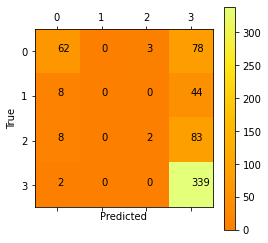

1.Cancer의 정밀도 :  77.5 %
1.Cancer의 재현율 :  43.35664335664335 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  40.0 %
3.Inflammatory의 재현율 :  2.1505376344086025 %
4.Normal의 정밀도 :  62.31617647058824 %
4.Normal의 재현율 :  99.41348973607037 %
None
Accuracy on Set: 61.5% (387 / 629)
Confusion Matrix:
[[ 56   0   3  84]
 [ 14   0   0  38]
 [ 18   0   4  71]
 [ 12   0   2 327]]


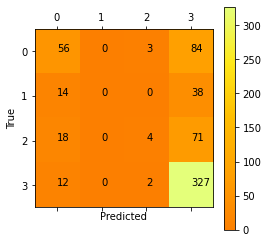

1.Cancer의 정밀도 :  56.00000000000001 %
1.Cancer의 재현율 :  39.16083916083916 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  44.44444444444444 %
3.Inflammatory의 재현율 :  4.301075268817205 %
4.Normal의 정밀도 :  62.88461538461539 %
4.Normal의 재현율 :  95.89442815249268 %
None
Epoch 33 --- Training Accuracy:  68.8%,  Validation Loss: 1.151
Accuracy on Set: 62.5% (393 / 629)
Confusion Matrix:
[[ 52   0   4  87]
 [  8   0   0  44]
 [  9   0   3  81]
 [  3   0   0 338]]


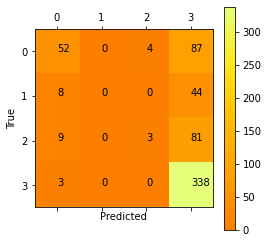

1.Cancer의 정밀도 :  72.22222222222221 %
1.Cancer의 재현율 :  36.36363636363637 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  42.857142857142854 %
3.Inflammatory의 재현율 :  3.225806451612903 %
4.Normal의 정밀도 :  61.45454545454545 %
4.Normal의 재현율 :  99.12023460410558 %
None
Accuracy on Set: 60.3% (379 / 629)
Confusion Matrix:
[[ 51   0   4  88]
 [ 10   0   2  40]
 [ 16   0   4  73]
 [ 15   0   2 324]]


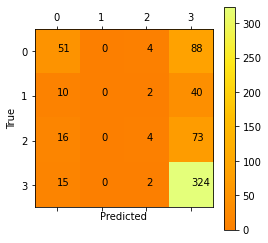

1.Cancer의 정밀도 :  55.434782608695656 %
1.Cancer의 재현율 :  35.66433566433567 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  33.33333333333333 %
3.Inflammatory의 재현율 :  4.301075268817205 %
4.Normal의 정밀도 :  61.71428571428571 %
4.Normal의 재현율 :  95.01466275659824 %
None
Epoch 34 --- Training Accuracy:  65.6%,  Validation Loss: 0.963
Accuracy on Set: 63.3% (398 / 629)
Confusion Matrix:
[[ 56   1   4  82]
 [  6   0   0  46]
 [  8   0   3  82]
 [  2   0   0 339]]


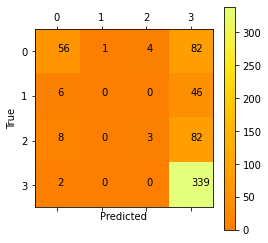

1.Cancer의 정밀도 :  77.77777777777779 %
1.Cancer의 재현율 :  39.16083916083916 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  42.857142857142854 %
3.Inflammatory의 재현율 :  3.225806451612903 %
4.Normal의 정밀도 :  61.74863387978142 %
4.Normal의 재현율 :  99.41348973607037 %
None
Accuracy on Set: 61.2% (385 / 629)
Confusion Matrix:
[[ 48   0   4  91]
 [  8   0   2  42]
 [ 12   0   6  75]
 [  8   0   2 331]]


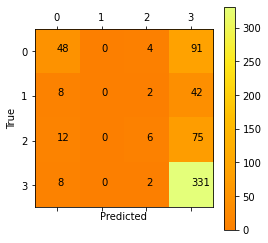

1.Cancer의 정밀도 :  63.1578947368421 %
1.Cancer의 재현율 :  33.56643356643357 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  42.857142857142854 %
3.Inflammatory의 재현율 :  6.451612903225806 %
4.Normal의 정밀도 :  61.4100185528757 %
4.Normal의 재현율 :  97.0674486803519 %
None
Epoch 35 --- Training Accuracy:  62.5%,  Validation Loss: 1.011
Accuracy on Set: 63.8% (401 / 629)
Confusion Matrix:
[[ 60   1  10  72]
 [  7   0   0  45]
 [ 10   0   4  79]
 [  4   0   0 337]]


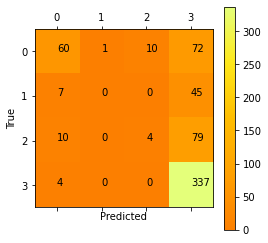

1.Cancer의 정밀도 :  74.07407407407408 %
1.Cancer의 재현율 :  41.95804195804196 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  28.57142857142857 %
3.Inflammatory의 재현율 :  4.301075268817205 %
4.Normal의 정밀도 :  63.22701688555347 %
4.Normal의 재현율 :  98.82697947214076 %
None
Accuracy on Set: 63.0% (396 / 629)
Confusion Matrix:
[[ 55   0   6  82]
 [ 11   0   3  38]
 [ 15   0  10  68]
 [  7   0   3 331]]


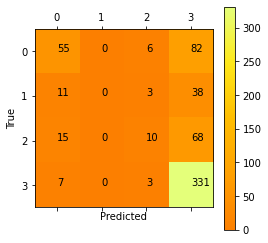

1.Cancer의 정밀도 :  62.5 %
1.Cancer의 재현율 :  38.46153846153847 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  45.45454545454545 %
3.Inflammatory의 재현율 :  10.75268817204301 %
4.Normal의 정밀도 :  63.77649325626204 %
4.Normal의 재현율 :  97.0674486803519 %
None
Epoch 36 --- Training Accuracy:  62.5%,  Validation Loss: 1.263
Accuracy on Set: 62.5% (393 / 629)
Confusion Matrix:
[[ 54   0   6  83]
 [  9   0   0  43]
 [  9   0   2  82]
 [  2   0   2 337]]


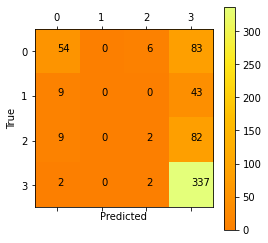

1.Cancer의 정밀도 :  72.97297297297297 %
1.Cancer의 재현율 :  37.76223776223776 %
2.Precancer의 정밀도 :  nan %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  20.0 %
3.Inflammatory의 재현율 :  2.1505376344086025 %
4.Normal의 정밀도 :  61.8348623853211 %
4.Normal의 재현율 :  98.82697947214076 %
None
Accuracy on Set: 61.7% (388 / 629)
Confusion Matrix:
[[ 49   0   3  91]
 [  6   0   2  44]
 [ 13   1   9  70]
 [  5   0   6 330]]


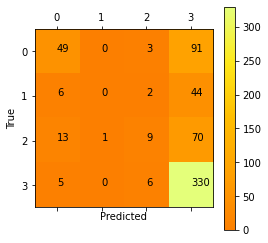

1.Cancer의 정밀도 :  67.12328767123287 %
1.Cancer의 재현율 :  34.26573426573427 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  45.0 %
3.Inflammatory의 재현율 :  9.67741935483871 %
4.Normal의 정밀도 :  61.6822429906542 %
4.Normal의 재현율 :  96.7741935483871 %
None
Epoch 37 --- Training Accuracy:  71.9%,  Validation Loss: 1.142
Accuracy on Set: 64.2% (404 / 629)
Confusion Matrix:
[[ 65   2   5  71]
 [  9   0   0  43]
 [  9   1   6  77]
 [  7   0   1 333]]


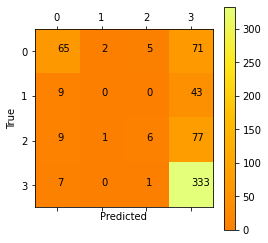

1.Cancer의 정밀도 :  72.22222222222221 %
1.Cancer의 재현율 :  45.45454545454545 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  50.0 %
3.Inflammatory의 재현율 :  6.451612903225806 %
4.Normal의 정밀도 :  63.54961832061069 %
4.Normal의 재현율 :  97.65395894428153 %
None
Accuracy on Set: 61.7% (388 / 629)
Confusion Matrix:
[[ 55   1  10  77]
 [ 17   0   3  32]
 [ 15   2  12  64]
 [ 13   1   6 321]]


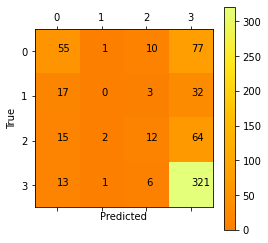

1.Cancer의 정밀도 :  55.00000000000001 %
1.Cancer의 재현율 :  38.46153846153847 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  38.70967741935484 %
3.Inflammatory의 재현율 :  12.903225806451612 %
4.Normal의 정밀도 :  64.97975708502024 %
4.Normal의 재현율 :  94.13489736070382 %
None
Epoch 38 --- Training Accuracy:  65.6%,  Validation Loss: 1.153
Accuracy on Set: 66.0% (415 / 629)
Confusion Matrix:
[[ 74   2   8  59]
 [ 12   1   2  37]
 [ 14   2  10  67]
 [  7   0   4 330]]


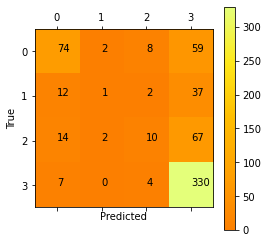

1.Cancer의 정밀도 :  69.1588785046729 %
1.Cancer의 재현율 :  51.74825174825175 %
2.Precancer의 정밀도 :  20.0 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  41.66666666666667 %
3.Inflammatory의 재현율 :  10.75268817204301 %
4.Normal의 정밀도 :  66.93711967545639 %
4.Normal의 재현율 :  96.7741935483871 %
None
Accuracy on Set: 61.4% (386 / 629)
Confusion Matrix:
[[ 66   0   7  70]
 [ 20   1   3  28]
 [ 20   1  10  62]
 [ 21   4   7 309]]


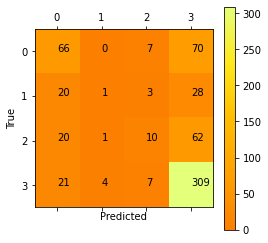

1.Cancer의 정밀도 :  51.96850393700787 %
1.Cancer의 재현율 :  46.15384615384615 %
2.Precancer의 정밀도 :  16.666666666666664 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  37.03703703703704 %
3.Inflammatory의 재현율 :  10.75268817204301 %
4.Normal의 정밀도 :  65.88486140724946 %
4.Normal의 재현율 :  90.6158357771261 %
None
Epoch 39 --- Training Accuracy:  75.0%,  Validation Loss: 1.191
Accuracy on Set: 63.6% (400 / 629)
Confusion Matrix:
[[ 66   2   7  68]
 [ 12   0   3  37]
 [ 10   1   6  76]
 [  8   1   4 328]]


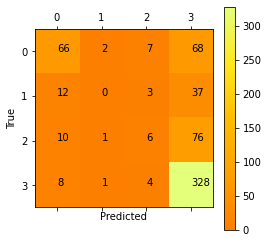

1.Cancer의 정밀도 :  68.75 %
1.Cancer의 재현율 :  46.15384615384615 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  30.0 %
3.Inflammatory의 재현율 :  6.451612903225806 %
4.Normal의 정밀도 :  64.44007858546169 %
4.Normal의 재현율 :  96.18768328445748 %
None
Accuracy on Set: 61.5% (387 / 629)
Confusion Matrix:
[[ 60   2   6  75]
 [ 15   0   2  35]
 [ 18   1  10  64]
 [ 14   0  10 317]]


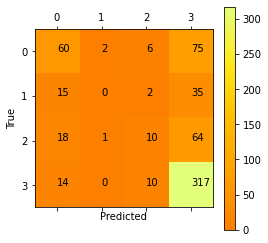

1.Cancer의 정밀도 :  56.074766355140184 %
1.Cancer의 재현율 :  41.95804195804196 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  35.714285714285715 %
3.Inflammatory의 재현율 :  10.75268817204301 %
4.Normal의 정밀도 :  64.56211812627292 %
4.Normal의 재현율 :  92.96187683284457 %
None
Epoch 40 --- Training Accuracy:  71.9%,  Validation Loss: 0.925
Accuracy on Set: 65.3% (411 / 629)
Confusion Matrix:
[[ 68   1   4  70]
 [ 12   0   1  39]
 [ 12   1   7  73]
 [  3   0   2 336]]


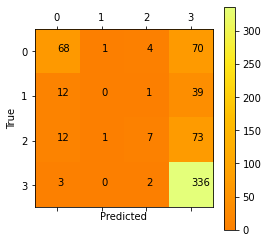

1.Cancer의 정밀도 :  71.57894736842105 %
1.Cancer의 재현율 :  47.55244755244755 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  50.0 %
3.Inflammatory의 재현율 :  7.526881720430108 %
4.Normal의 정밀도 :  64.86486486486487 %
4.Normal의 재현율 :  98.53372434017595 %
None
Accuracy on Set: 61.8% (389 / 629)
Confusion Matrix:
[[ 56   0  10  77]
 [ 14   2   1  35]
 [ 17   0   9  67]
 [ 13   1   5 322]]


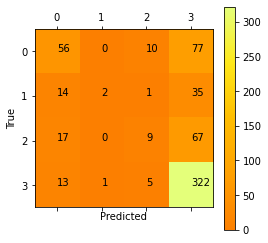

1.Cancer의 정밀도 :  56.00000000000001 %
1.Cancer의 재현율 :  39.16083916083916 %
2.Precancer의 정밀도 :  66.66666666666666 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  36.0 %
3.Inflammatory의 재현율 :  9.67741935483871 %
4.Normal의 정밀도 :  64.27145708582835 %
4.Normal의 재현율 :  94.42815249266863 %
None
Epoch 41 --- Training Accuracy:  81.2%,  Validation Loss: 0.777
Accuracy on Set: 63.9% (402 / 629)
Confusion Matrix:
[[ 58   5  10  70]
 [  9   1   1  41]
 [  9   1   9  74]
 [  1   0   6 334]]


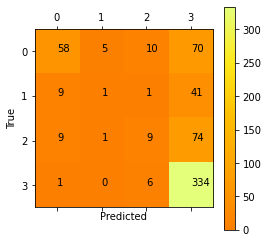

1.Cancer의 정밀도 :  75.32467532467533 %
1.Cancer의 재현율 :  40.55944055944056 %
2.Precancer의 정밀도 :  14.285714285714285 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  34.61538461538461 %
3.Inflammatory의 재현율 :  9.67741935483871 %
4.Normal의 정밀도 :  64.35452793834297 %
4.Normal의 재현율 :  97.94721407624634 %
None
Accuracy on Set: 61.4% (386 / 629)
Confusion Matrix:
[[ 51   3  13  76]
 [ 15   4   3  30]
 [ 15   2  13  63]
 [  8   3  12 318]]


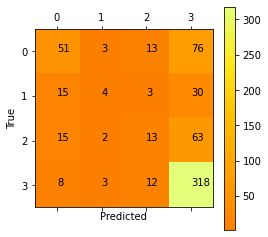

1.Cancer의 정밀도 :  57.30337078651685 %
1.Cancer의 재현율 :  35.66433566433567 %
2.Precancer의 정밀도 :  33.33333333333333 %
2.Precancer의 재현율 :  7.6923076923076925 %
3.Inflammatory의 정밀도 :  31.70731707317073 %
3.Inflammatory의 재현율 :  13.978494623655912 %
4.Normal의 정밀도 :  65.29774127310061 %
4.Normal의 재현율 :  93.25513196480938 %
None
Epoch 42 --- Training Accuracy:  62.5%,  Validation Loss: 1.237
Accuracy on Set: 65.3% (411 / 629)
Confusion Matrix:
[[ 72   6   5  60]
 [ 12   1   2  37]
 [ 10   0   7  76]
 [  9   1   0 331]]


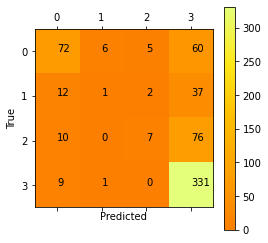

1.Cancer의 정밀도 :  69.90291262135922 %
1.Cancer의 재현율 :  50.349650349650354 %
2.Precancer의 정밀도 :  12.5 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  50.0 %
3.Inflammatory의 재현율 :  7.526881720430108 %
4.Normal의 정밀도 :  65.67460317460318 %
4.Normal의 재현율 :  97.0674486803519 %
None
Accuracy on Set: 62.6% (394 / 629)
Confusion Matrix:
[[ 68   4   6  65]
 [ 17   1   3  31]
 [ 18   2   8  65]
 [ 18   4   2 317]]


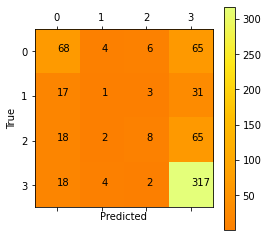

1.Cancer의 정밀도 :  56.19834710743802 %
1.Cancer의 재현율 :  47.55244755244755 %
2.Precancer의 정밀도 :  9.090909090909092 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  42.10526315789473 %
3.Inflammatory의 재현율 :  8.60215053763441 %
4.Normal의 정밀도 :  66.31799163179917 %
4.Normal의 재현율 :  92.96187683284457 %
None
Epoch 43 --- Training Accuracy:  75.0%,  Validation Loss: 1.723
Accuracy on Set: 62.3% (392 / 629)
Confusion Matrix:
[[ 54   6  17  66]
 [  9   1   3  39]
 [ 11   3   5  74]
 [  2   2   5 332]]


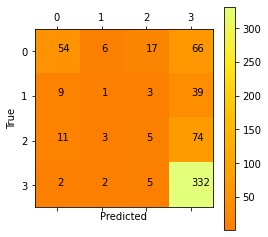

1.Cancer의 정밀도 :  71.05263157894737 %
1.Cancer의 재현율 :  37.76223776223776 %
2.Precancer의 정밀도 :  8.333333333333332 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  16.666666666666664 %
3.Inflammatory의 재현율 :  5.376344086021505 %
4.Normal의 정밀도 :  64.9706457925636 %
4.Normal의 재현율 :  97.36070381231671 %
None
Accuracy on Set: 60.6% (381 / 629)
Confusion Matrix:
[[ 52   4  10  77]
 [ 14   3   2  33]
 [ 13   5  11  64]
 [ 10   6  10 315]]


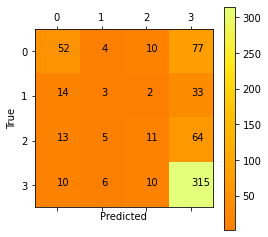

1.Cancer의 정밀도 :  58.42696629213483 %
1.Cancer의 재현율 :  36.36363636363637 %
2.Precancer의 정밀도 :  16.666666666666664 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  33.33333333333333 %
3.Inflammatory의 재현율 :  11.827956989247312 %
4.Normal의 정밀도 :  64.41717791411043 %
4.Normal의 재현율 :  92.37536656891496 %
None
Epoch 44 --- Training Accuracy:  62.5%,  Validation Loss: 0.980
Accuracy on Set: 63.3% (398 / 629)
Confusion Matrix:
[[ 53   5   6  79]
 [ 10   3   1  38]
 [ 13   1   6  73]
 [  4   0   1 336]]


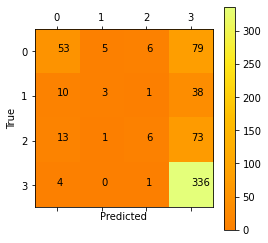

1.Cancer의 정밀도 :  66.25 %
1.Cancer의 재현율 :  37.06293706293706 %
2.Precancer의 정밀도 :  33.33333333333333 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  42.857142857142854 %
3.Inflammatory의 재현율 :  6.451612903225806 %
4.Normal의 정밀도 :  63.87832699619772 %
4.Normal의 재현율 :  98.53372434017595 %
None
Accuracy on Set: 61.0% (384 / 629)
Confusion Matrix:
[[ 54   5   9  75]
 [ 10   3   5  34]
 [ 16   1   7  69]
 [ 12   4   5 320]]


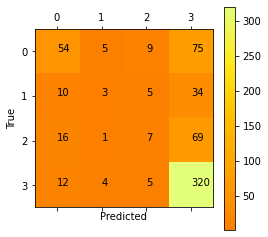

1.Cancer의 정밀도 :  58.69565217391305 %
1.Cancer의 재현율 :  37.76223776223776 %
2.Precancer의 정밀도 :  23.076923076923077 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  26.923076923076923 %
3.Inflammatory의 재현율 :  7.526881720430108 %
4.Normal의 정밀도 :  64.2570281124498 %
4.Normal의 재현율 :  93.841642228739 %
None
Epoch 45 --- Training Accuracy:  71.9%,  Validation Loss: 1.012
Accuracy on Set: 65.8% (414 / 629)
Confusion Matrix:
[[ 68   1  13  61]
 [  8   1   1  42]
 [ 10   0  13  70]
 [  5   0   4 332]]


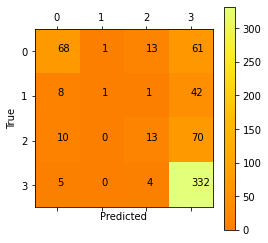

1.Cancer의 정밀도 :  74.72527472527473 %
1.Cancer의 재현율 :  47.55244755244755 %
2.Precancer의 정밀도 :  50.0 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  41.935483870967744 %
3.Inflammatory의 재현율 :  13.978494623655912 %
4.Normal의 정밀도 :  65.74257425742574 %
4.Normal의 재현율 :  97.36070381231671 %
None
Accuracy on Set: 60.7% (382 / 629)
Confusion Matrix:
[[ 55   1  13  74]
 [ 12   2   1  37]
 [ 19   2   9  63]
 [ 11   5   9 316]]


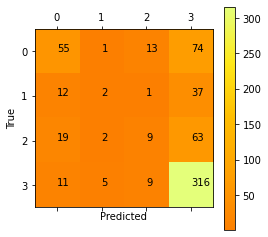

1.Cancer의 정밀도 :  56.70103092783505 %
1.Cancer의 재현율 :  38.46153846153847 %
2.Precancer의 정밀도 :  20.0 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  28.125 %
3.Inflammatory의 재현율 :  9.67741935483871 %
4.Normal의 정밀도 :  64.48979591836735 %
4.Normal의 재현율 :  92.66862170087975 %
None
Epoch 46 --- Training Accuracy:  68.8%,  Validation Loss: 1.090
Accuracy on Set: 64.2% (404 / 629)
Confusion Matrix:
[[ 71   4  11  57]
 [ 12   1   1  38]
 [  9   2   8  74]
 [ 11   1   5 324]]


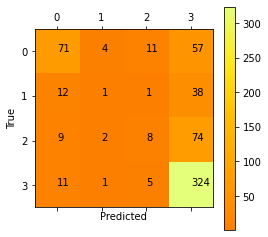

1.Cancer의 정밀도 :  68.93203883495146 %
1.Cancer의 재현율 :  49.65034965034965 %
2.Precancer의 정밀도 :  12.5 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  32.0 %
3.Inflammatory의 재현율 :  8.60215053763441 %
4.Normal의 정밀도 :  65.72008113590265 %
4.Normal의 재현율 :  95.01466275659824 %
None
Accuracy on Set: 61.5% (387 / 629)
Confusion Matrix:
[[ 63   4   6  70]
 [ 21   0   1  30]
 [ 19   0   8  66]
 [ 16   3   6 316]]


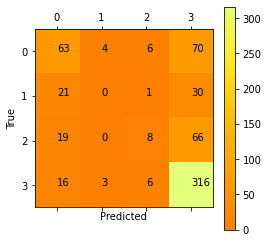

1.Cancer의 정밀도 :  52.94117647058824 %
1.Cancer의 재현율 :  44.05594405594406 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  38.095238095238095 %
3.Inflammatory의 재현율 :  8.60215053763441 %
4.Normal의 정밀도 :  65.56016597510373 %
4.Normal의 재현율 :  92.66862170087975 %
None
Epoch 47 --- Training Accuracy:  71.9%,  Validation Loss: 1.013
Accuracy on Set: 66.0% (415 / 629)
Confusion Matrix:
[[ 68   5  20  50]
 [ 10   1   3  38]
 [ 14   1  15  63]
 [  5   1   4 331]]


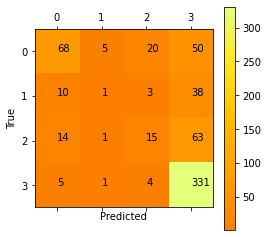

1.Cancer의 정밀도 :  70.10309278350515 %
1.Cancer의 재현율 :  47.55244755244755 %
2.Precancer의 정밀도 :  12.5 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  35.714285714285715 %
3.Inflammatory의 재현율 :  16.129032258064516 %
4.Normal의 정밀도 :  68.67219917012449 %
4.Normal의 재현율 :  97.0674486803519 %
None
Accuracy on Set: 61.2% (385 / 629)
Confusion Matrix:
[[ 59   5  13  66]
 [ 14   1   7  30]
 [ 18   1  20  54]
 [ 16   6  14 305]]


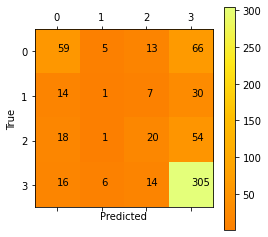

1.Cancer의 정밀도 :  55.140186915887845 %
1.Cancer의 재현율 :  41.25874125874126 %
2.Precancer의 정밀도 :  7.6923076923076925 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  37.03703703703704 %
3.Inflammatory의 재현율 :  21.50537634408602 %
4.Normal의 정밀도 :  67.03296703296702 %
4.Normal의 재현율 :  89.44281524926686 %
None
Epoch 48 --- Training Accuracy:  75.0%,  Validation Loss: 0.943
Accuracy on Set: 67.6% (425 / 629)
Confusion Matrix:
[[ 82   2  16  43]
 [ 12   3   4  33]
 [ 17   1  12  63]
 [  8   1   4 328]]


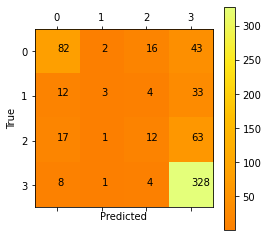

1.Cancer의 정밀도 :  68.90756302521008 %
1.Cancer의 재현율 :  57.34265734265735 %
2.Precancer의 정밀도 :  42.857142857142854 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  33.33333333333333 %
3.Inflammatory의 재현율 :  12.903225806451612 %
4.Normal의 정밀도 :  70.2355460385439 %
4.Normal의 재현율 :  96.18768328445748 %
None
Accuracy on Set: 60.9% (383 / 629)
Confusion Matrix:
[[ 66   3   9  65]
 [ 24   3   3  22]
 [ 21   1  17  54]
 [ 30   7   7 297]]


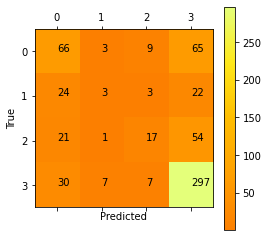

1.Cancer의 정밀도 :  46.808510638297875 %
1.Cancer의 재현율 :  46.15384615384615 %
2.Precancer의 정밀도 :  21.428571428571427 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  47.22222222222222 %
3.Inflammatory의 재현율 :  18.27956989247312 %
4.Normal의 정밀도 :  67.8082191780822 %
4.Normal의 재현율 :  87.09677419354838 %
None
Epoch 49 --- Training Accuracy:  81.2%,  Validation Loss: 0.927
Accuracy on Set: 63.6% (400 / 629)
Confusion Matrix:
[[ 54   5  16  68]
 [ 10   1   3  38]
 [  9   1   9  74]
 [  2   0   3 336]]


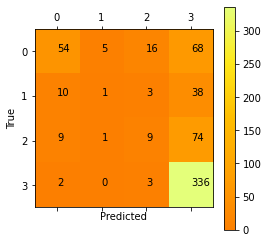

1.Cancer의 정밀도 :  72.0 %
1.Cancer의 재현율 :  37.76223776223776 %
2.Precancer의 정밀도 :  14.285714285714285 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  29.03225806451613 %
3.Inflammatory의 재현율 :  9.67741935483871 %
4.Normal의 정밀도 :  65.11627906976744 %
4.Normal의 재현율 :  98.53372434017595 %
None
Accuracy on Set: 61.2% (385 / 629)
Confusion Matrix:
[[ 53   5  17  68]
 [ 11   3   4  34]
 [ 14   1  19  59]
 [ 10   7  14 310]]


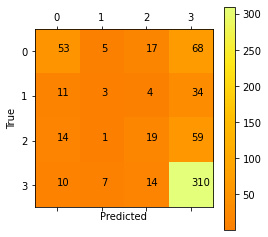

1.Cancer의 정밀도 :  60.22727272727273 %
1.Cancer의 재현율 :  37.06293706293706 %
2.Precancer의 정밀도 :  18.75 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  35.18518518518518 %
3.Inflammatory의 재현율 :  20.43010752688172 %
4.Normal의 정밀도 :  65.81740976645435 %
4.Normal의 재현율 :  90.9090909090909 %
None
Epoch 50 --- Training Accuracy:  78.1%,  Validation Loss: 1.223
Accuracy on Set: 66.5% (418 / 629)
Confusion Matrix:
[[ 78   3  13  49]
 [  9   2   5  36]
 [ 11   1  15  66]
 [ 10   0   8 323]]


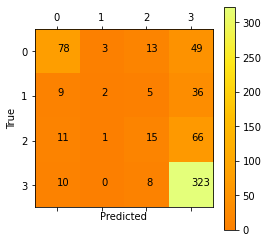

1.Cancer의 정밀도 :  72.22222222222221 %
1.Cancer의 재현율 :  54.54545454545454 %
2.Precancer의 정밀도 :  33.33333333333333 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  36.58536585365854 %
3.Inflammatory의 재현율 :  16.129032258064516 %
4.Normal의 정밀도 :  68.14345991561181 %
4.Normal의 재현율 :  94.72140762463343 %
None
Accuracy on Set: 63.0% (396 / 629)
Confusion Matrix:
[[ 64   4  19  56]
 [ 19   2   5  26]
 [ 21   0  23  49]
 [ 16   5  13 307]]


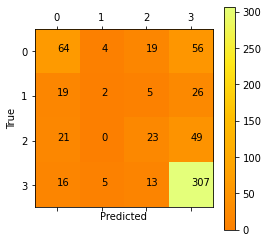

1.Cancer의 정밀도 :  53.333333333333336 %
1.Cancer의 재현율 :  44.75524475524475 %
2.Precancer의 정밀도 :  18.181818181818183 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  38.333333333333336 %
3.Inflammatory의 재현율 :  24.731182795698924 %
4.Normal의 정밀도 :  70.09132420091323 %
4.Normal의 재현율 :  90.02932551319648 %
None
Epoch 51 --- Training Accuracy:  75.0%,  Validation Loss: 1.035
Accuracy on Set: 64.2% (404 / 629)
Confusion Matrix:
[[ 57   7  16  63]
 [ 10   4   5  33]
 [  9   2  13  69]
 [  3   3   5 330]]


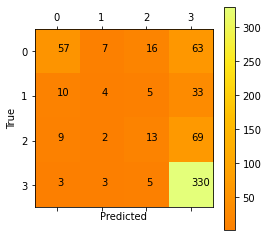

1.Cancer의 정밀도 :  72.15189873417721 %
1.Cancer의 재현율 :  39.86013986013986 %
2.Precancer의 정밀도 :  25.0 %
2.Precancer의 재현율 :  7.6923076923076925 %
3.Inflammatory의 정밀도 :  33.33333333333333 %
3.Inflammatory의 재현율 :  13.978494623655912 %
4.Normal의 정밀도 :  66.66666666666666 %
4.Normal의 재현율 :  96.7741935483871 %
None
Accuracy on Set: 59.5% (374 / 629)
Confusion Matrix:
[[ 53   5  17  68]
 [ 17   2   6  27]
 [ 21   0  17  55]
 [ 18   1  20 302]]


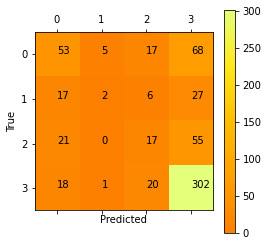

1.Cancer의 정밀도 :  48.62385321100918 %
1.Cancer의 재현율 :  37.06293706293706 %
2.Precancer의 정밀도 :  25.0 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  28.333333333333332 %
3.Inflammatory의 재현율 :  18.27956989247312 %
4.Normal의 정밀도 :  66.8141592920354 %
4.Normal의 재현율 :  88.56304985337243 %
None
Epoch 52 --- Training Accuracy:  75.0%,  Validation Loss: 1.285
Accuracy on Set: 64.2% (404 / 629)
Confusion Matrix:
[[ 74   4  17  48]
 [ 17   3   2  30]
 [ 22   5  11  55]
 [ 13   2  10 316]]


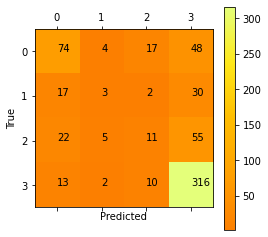

1.Cancer의 정밀도 :  58.730158730158735 %
1.Cancer의 재현율 :  51.74825174825175 %
2.Precancer의 정밀도 :  21.428571428571427 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  27.500000000000004 %
3.Inflammatory의 재현율 :  11.827956989247312 %
4.Normal의 정밀도 :  70.37861915367483 %
4.Normal의 재현율 :  92.66862170087975 %
None
Accuracy on Set: 61.2% (385 / 629)
Confusion Matrix:
[[ 66   8  13  56]
 [ 21   4   3  24]
 [ 21   0  21  51]
 [ 23   8  16 294]]


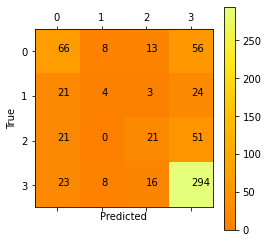

1.Cancer의 정밀도 :  50.38167938931297 %
1.Cancer의 재현율 :  46.15384615384615 %
2.Precancer의 정밀도 :  20.0 %
2.Precancer의 재현율 :  7.6923076923076925 %
3.Inflammatory의 정밀도 :  39.62264150943396 %
3.Inflammatory의 재현율 :  22.58064516129032 %
4.Normal의 정밀도 :  69.17647058823529 %
4.Normal의 재현율 :  86.21700879765396 %
None
Epoch 53 --- Training Accuracy:  68.8%,  Validation Loss: 1.498
Accuracy on Set: 64.5% (406 / 629)
Confusion Matrix:
[[ 59   4  17  63]
 [ 11   0   4  37]
 [  9   2  14  68]
 [  3   1   4 333]]


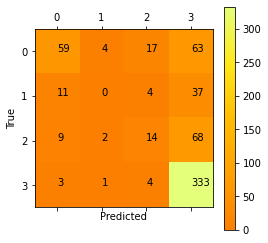

1.Cancer의 정밀도 :  71.95121951219512 %
1.Cancer의 재현율 :  41.25874125874126 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  35.8974358974359 %
3.Inflammatory의 재현율 :  15.053763440860216 %
4.Normal의 정밀도 :  66.46706586826348 %
4.Normal의 재현율 :  97.65395894428153 %
None
Accuracy on Set: 60.9% (383 / 629)
Confusion Matrix:
[[ 56   4  17  66]
 [ 10   1   8  33]
 [ 16   0  17  60]
 [ 16   4  12 309]]


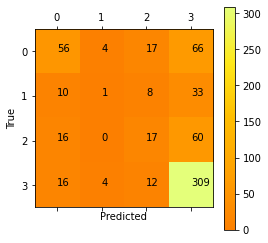

1.Cancer의 정밀도 :  57.14285714285714 %
1.Cancer의 재현율 :  39.16083916083916 %
2.Precancer의 정밀도 :  11.11111111111111 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  31.48148148148148 %
3.Inflammatory의 재현율 :  18.27956989247312 %
4.Normal의 정밀도 :  66.02564102564102 %
4.Normal의 재현율 :  90.6158357771261 %
None
Epoch 54 --- Training Accuracy:  78.1%,  Validation Loss: 1.570
Accuracy on Set: 63.0% (396 / 629)
Confusion Matrix:
[[ 49   9  13  72]
 [  8   1   3  40]
 [  8   1  12  72]
 [  2   1   4 334]]


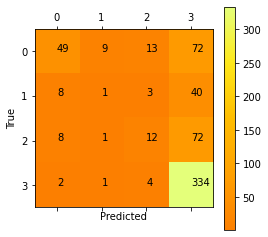

1.Cancer의 정밀도 :  73.13432835820896 %
1.Cancer의 재현율 :  34.26573426573427 %
2.Precancer의 정밀도 :  8.333333333333332 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  37.5 %
3.Inflammatory의 재현율 :  12.903225806451612 %
4.Normal의 정밀도 :  64.47876447876449 %
4.Normal의 재현율 :  97.94721407624634 %
None
Accuracy on Set: 59.6% (375 / 629)
Confusion Matrix:
[[ 42   4  13  84]
 [ 11   5   6  30]
 [ 13   2  11  67]
 [ 16   1   7 317]]


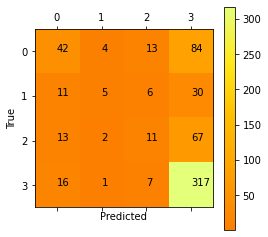

1.Cancer의 정밀도 :  51.21951219512195 %
1.Cancer의 재현율 :  29.37062937062937 %
2.Precancer의 정밀도 :  41.66666666666667 %
2.Precancer의 재현율 :  9.615384615384617 %
3.Inflammatory의 정밀도 :  29.72972972972973 %
3.Inflammatory의 재현율 :  11.827956989247312 %
4.Normal의 정밀도 :  63.65461847389559 %
4.Normal의 재현율 :  92.96187683284457 %
None
Epoch 55 --- Training Accuracy:  68.8%,  Validation Loss: 1.809
Accuracy on Set: 63.1% (397 / 629)
Confusion Matrix:
[[ 46  10  18  69]
 [  8   3   3  38]
 [  6   2  14  71]
 [  1   3   3 334]]


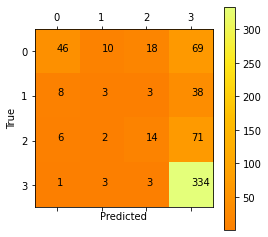

1.Cancer의 정밀도 :  75.40983606557377 %
1.Cancer의 재현율 :  32.16783216783217 %
2.Precancer의 정밀도 :  16.666666666666664 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  36.84210526315789 %
3.Inflammatory의 재현율 :  15.053763440860216 %
4.Normal의 정밀도 :  65.234375 %
4.Normal의 재현율 :  97.94721407624634 %
None
Accuracy on Set: 59.3% (373 / 629)
Confusion Matrix:
[[ 40   8  10  85]
 [  9   4   5  34]
 [ 11   5  11  66]
 [ 15   1   7 318]]


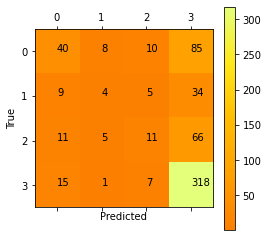

1.Cancer의 정밀도 :  53.333333333333336 %
1.Cancer의 재현율 :  27.972027972027973 %
2.Precancer의 정밀도 :  22.22222222222222 %
2.Precancer의 재현율 :  7.6923076923076925 %
3.Inflammatory의 정밀도 :  33.33333333333333 %
3.Inflammatory의 재현율 :  11.827956989247312 %
4.Normal의 정밀도 :  63.22067594433399 %
4.Normal의 재현율 :  93.25513196480938 %
None
Epoch 56 --- Training Accuracy:  75.0%,  Validation Loss: 1.357
Accuracy on Set: 63.3% (398 / 629)
Confusion Matrix:
[[ 54   8  18  63]
 [ 11   1   3  37]
 [  9   1  13  70]
 [  1   1   9 330]]


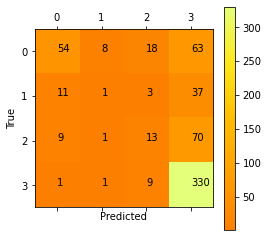

1.Cancer의 정밀도 :  72.0 %
1.Cancer의 재현율 :  37.76223776223776 %
2.Precancer의 정밀도 :  9.090909090909092 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  30.23255813953488 %
3.Inflammatory의 재현율 :  13.978494623655912 %
4.Normal의 정밀도 :  66.0 %
4.Normal의 재현율 :  96.7741935483871 %
None
Accuracy on Set: 60.7% (382 / 629)
Confusion Matrix:
[[ 51   8   8  76]
 [ 12   4   5  31]
 [ 18   3  15  57]
 [ 17   1  11 312]]


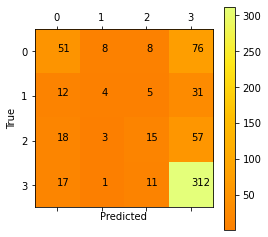

1.Cancer의 정밀도 :  52.04081632653062 %
1.Cancer의 재현율 :  35.66433566433567 %
2.Precancer의 정밀도 :  25.0 %
2.Precancer의 재현율 :  7.6923076923076925 %
3.Inflammatory의 정밀도 :  38.46153846153847 %
3.Inflammatory의 재현율 :  16.129032258064516 %
4.Normal의 정밀도 :  65.54621848739495 %
4.Normal의 재현율 :  91.49560117302052 %
None
Epoch 57 --- Training Accuracy:  78.1%,  Validation Loss: 1.499
Accuracy on Set: 66.1% (416 / 629)
Confusion Matrix:
[[ 75   5  14  49]
 [ 13   0   4  35]
 [ 10   4  13  66]
 [  4   1   8 328]]


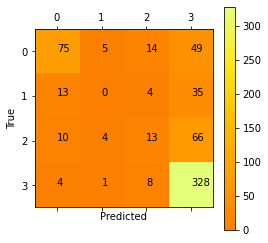

1.Cancer의 정밀도 :  73.52941176470588 %
1.Cancer의 재현율 :  52.44755244755245 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  33.33333333333333 %
3.Inflammatory의 재현율 :  13.978494623655912 %
4.Normal의 정밀도 :  68.6192468619247 %
4.Normal의 재현율 :  96.18768328445748 %
None
Accuracy on Set: 61.8% (389 / 629)
Confusion Matrix:
[[ 57   8  11  67]
 [ 15   6   6  25]
 [ 20   1  17  55]
 [ 14   5  13 309]]


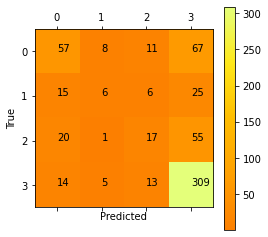

1.Cancer의 정밀도 :  53.77358490566038 %
1.Cancer의 재현율 :  39.86013986013986 %
2.Precancer의 정밀도 :  30.0 %
2.Precancer의 재현율 :  11.538461538461538 %
3.Inflammatory의 정밀도 :  36.17021276595745 %
3.Inflammatory의 재현율 :  18.27956989247312 %
4.Normal의 정밀도 :  67.76315789473685 %
4.Normal의 재현율 :  90.6158357771261 %
None
Epoch 58 --- Training Accuracy:  84.4%,  Validation Loss: 1.649
Accuracy on Set: 65.0% (409 / 629)
Confusion Matrix:
[[ 66   4  22  51]
 [ 12   2   6  32]
 [ 13   0  15  65]
 [  6   2   7 326]]


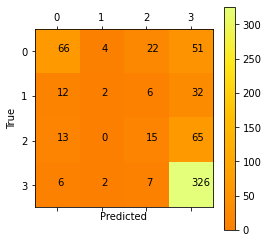

1.Cancer의 정밀도 :  68.04123711340206 %
1.Cancer의 재현율 :  46.15384615384615 %
2.Precancer의 정밀도 :  25.0 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  30.0 %
3.Inflammatory의 재현율 :  16.129032258064516 %
4.Normal의 정밀도 :  68.77637130801688 %
4.Normal의 재현율 :  95.60117302052787 %
None
Accuracy on Set: 61.5% (387 / 629)
Confusion Matrix:
[[ 64   8   9  62]
 [ 16   3   6  27]
 [ 23   3  18  49]
 [ 21   0  18 302]]


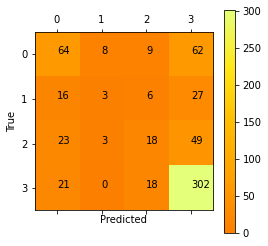

1.Cancer의 정밀도 :  51.61290322580645 %
1.Cancer의 재현율 :  44.75524475524475 %
2.Precancer의 정밀도 :  21.428571428571427 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  35.294117647058826 %
3.Inflammatory의 재현율 :  19.35483870967742 %
4.Normal의 정밀도 :  68.63636363636364 %
4.Normal의 재현율 :  88.56304985337243 %
None
Epoch 59 --- Training Accuracy:  75.0%,  Validation Loss: 0.851
Accuracy on Set: 63.6% (400 / 629)
Confusion Matrix:
[[ 62   6  28  47]
 [ 11   1   6  34]
 [ 10   3  22  58]
 [  7   4  15 315]]


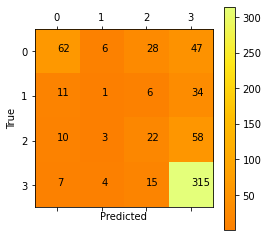

1.Cancer의 정밀도 :  68.88888888888889 %
1.Cancer의 재현율 :  43.35664335664335 %
2.Precancer의 정밀도 :  7.142857142857142 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  30.985915492957744 %
3.Inflammatory의 재현율 :  23.655913978494624 %
4.Normal의 정밀도 :  69.38325991189427 %
4.Normal의 재현율 :  92.37536656891496 %
None
Accuracy on Set: 59.5% (374 / 629)
Confusion Matrix:
[[ 52   6  30  55]
 [ 15   3  11  23]
 [ 24   3  21  45]
 [ 17   4  22 298]]


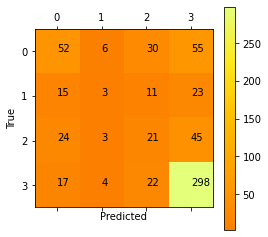

1.Cancer의 정밀도 :  48.148148148148145 %
1.Cancer의 재현율 :  36.36363636363637 %
2.Precancer의 정밀도 :  18.75 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  25.0 %
3.Inflammatory의 재현율 :  22.58064516129032 %
4.Normal의 정밀도 :  70.78384798099762 %
4.Normal의 재현율 :  87.3900293255132 %
None
Epoch 60 --- Training Accuracy:  71.9%,  Validation Loss: 1.180
Accuracy on Set: 65.7% (413 / 629)
Confusion Matrix:
[[ 76   6  22  39]
 [ 15   3   5  29]
 [ 20   0  18  55]
 [  8   3  14 316]]


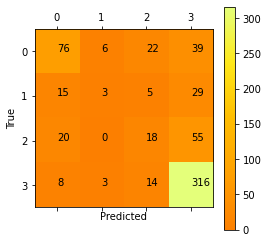

1.Cancer의 정밀도 :  63.86554621848739 %
1.Cancer의 재현율 :  53.14685314685315 %
2.Precancer의 정밀도 :  25.0 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  30.508474576271187 %
3.Inflammatory의 재현율 :  19.35483870967742 %
4.Normal의 정밀도 :  71.98177676537586 %
4.Normal의 재현율 :  92.66862170087975 %
None
Accuracy on Set: 60.1% (378 / 629)
Confusion Matrix:
[[ 63   8  20  52]
 [ 23   2   7  20]
 [ 19   2  27  45]
 [ 31   6  18 286]]


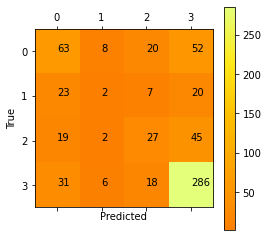

1.Cancer의 정밀도 :  46.32352941176471 %
1.Cancer의 재현율 :  44.05594405594406 %
2.Precancer의 정밀도 :  11.11111111111111 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  37.5 %
3.Inflammatory의 재현율 :  29.03225806451613 %
4.Normal의 정밀도 :  70.96774193548387 %
4.Normal의 재현율 :  83.87096774193549 %
None
Epoch 61 --- Training Accuracy:  71.9%,  Validation Loss: 1.474
Accuracy on Set: 66.0% (415 / 629)
Confusion Matrix:
[[ 83   2  27  31]
 [ 17   1   8  26]
 [ 17   2  25  49]
 [ 21   0  14 306]]


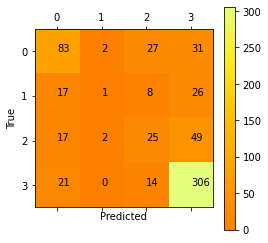

1.Cancer의 정밀도 :  60.14492753623188 %
1.Cancer의 재현율 :  58.04195804195804 %
2.Precancer의 정밀도 :  20.0 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  33.78378378378378 %
3.Inflammatory의 재현율 :  26.881720430107524 %
4.Normal의 정밀도 :  74.27184466019418 %
4.Normal의 재현율 :  89.73607038123167 %
None
Accuracy on Set: 60.9% (383 / 629)
Confusion Matrix:
[[ 78   2  20  43]
 [ 20   2   9  21]
 [ 30   1  19  43]
 [ 25   2  30 284]]


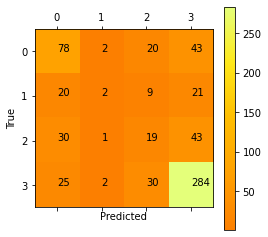

1.Cancer의 정밀도 :  50.98039215686274 %
1.Cancer의 재현율 :  54.54545454545454 %
2.Precancer의 정밀도 :  28.57142857142857 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  24.358974358974358 %
3.Inflammatory의 재현율 :  20.43010752688172 %
4.Normal의 정밀도 :  72.63427109974424 %
4.Normal의 재현율 :  83.28445747800586 %
None
Epoch 62 --- Training Accuracy:  78.1%,  Validation Loss: 2.098
Accuracy on Set: 66.1% (416 / 629)
Confusion Matrix:
[[ 80   2  17  44]
 [ 15   1   3  33]
 [ 11   1  12  69]
 [ 10   1   7 323]]


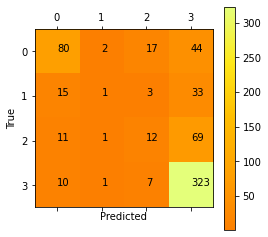

1.Cancer의 정밀도 :  68.96551724137932 %
1.Cancer의 재현율 :  55.94405594405595 %
2.Precancer의 정밀도 :  20.0 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  30.76923076923077 %
3.Inflammatory의 재현율 :  12.903225806451612 %
4.Normal의 정밀도 :  68.86993603411514 %
4.Normal의 재현율 :  94.72140762463343 %
None
Accuracy on Set: 63.0% (396 / 629)
Confusion Matrix:
[[ 72   1  15  55]
 [ 22   2   8  20]
 [ 21   1  14  57]
 [ 21   2  10 308]]


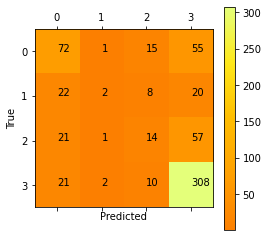

1.Cancer의 정밀도 :  52.94117647058824 %
1.Cancer의 재현율 :  50.349650349650354 %
2.Precancer의 정밀도 :  33.33333333333333 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  29.78723404255319 %
3.Inflammatory의 재현율 :  15.053763440860216 %
4.Normal의 정밀도 :  70.0 %
4.Normal의 재현율 :  90.32258064516128 %
None
Epoch 63 --- Training Accuracy:  81.2%,  Validation Loss: 1.325
Accuracy on Set: 66.1% (416 / 629)
Confusion Matrix:
[[ 67   3  28  45]
 [ 13   2   4  33]
 [  8   2  20  63]
 [  4   1   9 327]]


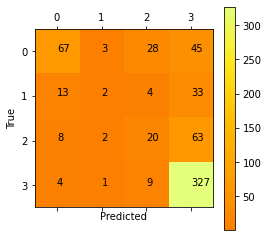

1.Cancer의 정밀도 :  72.82608695652173 %
1.Cancer의 재현율 :  46.85314685314685 %
2.Precancer의 정밀도 :  25.0 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  32.78688524590164 %
3.Inflammatory의 재현율 :  21.50537634408602 %
4.Normal의 정밀도 :  69.87179487179486 %
4.Normal의 재현율 :  95.89442815249268 %
None
Accuracy on Set: 61.8% (389 / 629)
Confusion Matrix:
[[ 61   3  23  56]
 [ 15   0  10  27]
 [ 20   1  22  50]
 [ 16   2  17 306]]


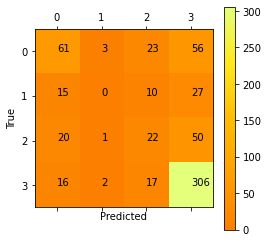

1.Cancer의 정밀도 :  54.46428571428571 %
1.Cancer의 재현율 :  42.65734265734265 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  30.555555555555557 %
3.Inflammatory의 재현율 :  23.655913978494624 %
4.Normal의 정밀도 :  69.70387243735763 %
4.Normal의 재현율 :  89.73607038123167 %
None
Epoch 64 --- Training Accuracy:  78.1%,  Validation Loss: 1.124
Accuracy on Set: 62.5% (393 / 629)
Confusion Matrix:
[[ 57   6  28  52]
 [ 14   0   9  29]
 [ 10   1  24  58]
 [ 10   1  18 312]]


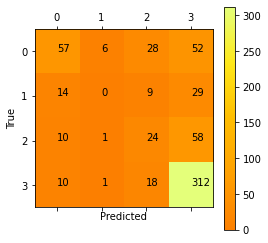

1.Cancer의 정밀도 :  62.637362637362635 %
1.Cancer의 재현율 :  39.86013986013986 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  30.37974683544304 %
3.Inflammatory의 재현율 :  25.806451612903224 %
4.Normal의 정밀도 :  69.17960088691795 %
4.Normal의 재현율 :  91.49560117302052 %
None
Accuracy on Set: 62.6% (394 / 629)
Confusion Matrix:
[[ 67   3  19  54]
 [ 15   3   8  26]
 [ 20   0  22  51]
 [ 12   5  22 302]]


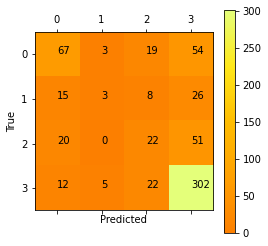

1.Cancer의 정밀도 :  58.77192982456141 %
1.Cancer의 재현율 :  46.85314685314685 %
2.Precancer의 정밀도 :  27.27272727272727 %
2.Precancer의 재현율 :  5.769230769230769 %
3.Inflammatory의 정밀도 :  30.985915492957744 %
3.Inflammatory의 재현율 :  23.655913978494624 %
4.Normal의 정밀도 :  69.7459584295612 %
4.Normal의 재현율 :  88.56304985337243 %
None
Epoch 65 --- Training Accuracy:  84.4%,  Validation Loss: 0.993
Accuracy on Set: 64.2% (404 / 629)
Confusion Matrix:
[[ 78   4  18  43]
 [ 13   2   7  30]
 [ 17   4  18  54]
 [ 21   4  10 306]]


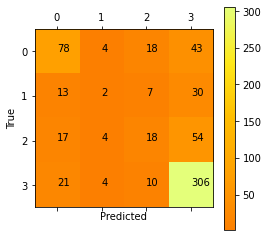

1.Cancer의 정밀도 :  60.46511627906976 %
1.Cancer의 재현율 :  54.54545454545454 %
2.Precancer의 정밀도 :  14.285714285714285 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  33.9622641509434 %
3.Inflammatory의 재현율 :  19.35483870967742 %
4.Normal의 정밀도 :  70.66974595842956 %
4.Normal의 재현율 :  89.73607038123167 %
None
Accuracy on Set: 62.0% (390 / 629)
Confusion Matrix:
[[ 73   5  18  47]
 [ 23   5   2  22]
 [ 25   0  23  45]
 [ 23   2  27 289]]


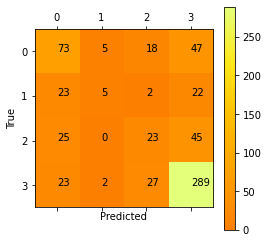

1.Cancer의 정밀도 :  50.69444444444444 %
1.Cancer의 재현율 :  51.048951048951054 %
2.Precancer의 정밀도 :  41.66666666666667 %
2.Precancer의 재현율 :  9.615384615384617 %
3.Inflammatory의 정밀도 :  32.857142857142854 %
3.Inflammatory의 재현율 :  24.731182795698924 %
4.Normal의 정밀도 :  71.712158808933 %
4.Normal의 재현율 :  84.75073313782991 %
None
Epoch 66 --- Training Accuracy:  78.1%,  Validation Loss: 1.924
Accuracy on Set: 66.0% (415 / 629)
Confusion Matrix:
[[ 79   4  16  44]
 [ 13   1   8  30]
 [ 13   2  21  57]
 [ 20   0   7 314]]


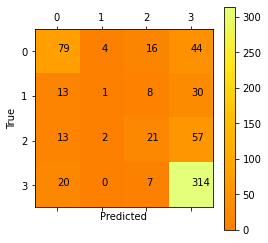

1.Cancer의 정밀도 :  63.2 %
1.Cancer의 재현율 :  55.24475524475524 %
2.Precancer의 정밀도 :  14.285714285714285 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  40.38461538461539 %
3.Inflammatory의 재현율 :  22.58064516129032 %
4.Normal의 정밀도 :  70.56179775280899 %
4.Normal의 재현율 :  92.08211143695014 %
None
Accuracy on Set: 61.5% (387 / 629)
Confusion Matrix:
[[ 69   4  22  48]
 [ 23   1   6  22]
 [ 23   1  23  46]
 [ 20   2  25 294]]


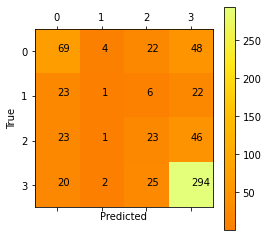

1.Cancer의 정밀도 :  51.11111111111111 %
1.Cancer의 재현율 :  48.25174825174825 %
2.Precancer의 정밀도 :  12.5 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  30.263157894736842 %
3.Inflammatory의 재현율 :  24.731182795698924 %
4.Normal의 정밀도 :  71.70731707317073 %
4.Normal의 재현율 :  86.21700879765396 %
None
Epoch 67 --- Training Accuracy:  81.2%,  Validation Loss: 1.704
Accuracy on Set: 65.0% (409 / 629)
Confusion Matrix:
[[ 74   6  18  45]
 [ 17   0   3  32]
 [ 12   6  18  57]
 [ 16   2   6 317]]


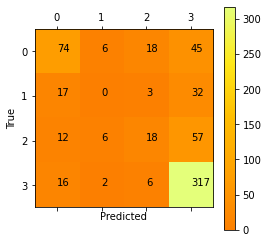

1.Cancer의 정밀도 :  62.18487394957983 %
1.Cancer의 재현율 :  51.74825174825175 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  40.0 %
3.Inflammatory의 재현율 :  19.35483870967742 %
4.Normal의 정밀도 :  70.28824833702882 %
4.Normal의 재현율 :  92.96187683284457 %
None
Accuracy on Set: 60.3% (379 / 629)
Confusion Matrix:
[[ 70   6  13  54]
 [ 21   2   5  24]
 [ 24   0  16  53]
 [ 26   0  24 291]]


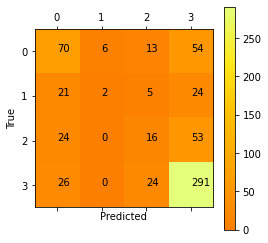

1.Cancer의 정밀도 :  49.645390070921984 %
1.Cancer의 재현율 :  48.95104895104895 %
2.Precancer의 정밀도 :  25.0 %
2.Precancer의 재현율 :  3.8461538461538463 %
3.Inflammatory의 정밀도 :  27.586206896551722 %
3.Inflammatory의 재현율 :  17.20430107526882 %
4.Normal의 정밀도 :  68.95734597156398 %
4.Normal의 재현율 :  85.33724340175954 %
None
Epoch 68 --- Training Accuracy:  93.8%,  Validation Loss: 1.709
Accuracy on Set: 64.7% (407 / 629)
Confusion Matrix:
[[ 70   2  16  55]
 [ 11   0   4  37]
 [ 13   2  15  63]
 [ 14   1   4 322]]


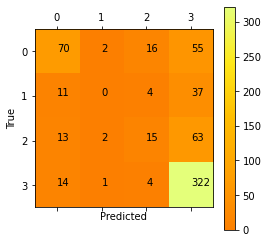

1.Cancer의 정밀도 :  64.81481481481481 %
1.Cancer의 재현율 :  48.95104895104895 %
2.Precancer의 정밀도 :  0.0 %
2.Precancer의 재현율 :  0.0 %
3.Inflammatory의 정밀도 :  38.46153846153847 %
3.Inflammatory의 재현율 :  16.129032258064516 %
4.Normal의 정밀도 :  67.50524109014675 %
4.Normal의 재현율 :  94.42815249266863 %
None
Accuracy on Set: 62.2% (391 / 629)
Confusion Matrix:
[[ 65   2  14  62]
 [ 15   1   6  30]
 [ 21   4  12  56]
 [ 20   1   7 313]]


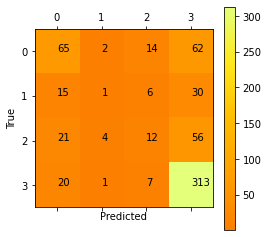

1.Cancer의 정밀도 :  53.71900826446281 %
1.Cancer의 재현율 :  45.45454545454545 %
2.Precancer의 정밀도 :  12.5 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  30.76923076923077 %
3.Inflammatory의 재현율 :  12.903225806451612 %
4.Normal의 정밀도 :  67.89587852494577 %
4.Normal의 재현율 :  91.78885630498533 %
None
Epoch 69 --- Training Accuracy:  81.2%,  Validation Loss: 1.753
Accuracy on Set: 64.5% (406 / 629)
Confusion Matrix:
[[ 68   6  12  57]
 [ 10   1   3  38]
 [ 13   2  10  68]
 [ 10   0   4 327]]


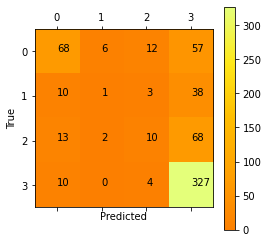

1.Cancer의 정밀도 :  67.32673267326733 %
1.Cancer의 재현율 :  47.55244755244755 %
2.Precancer의 정밀도 :  11.11111111111111 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  34.48275862068966 %
3.Inflammatory의 재현율 :  10.75268817204301 %
4.Normal의 정밀도 :  66.73469387755102 %
4.Normal의 재현율 :  95.89442815249268 %
None
Accuracy on Set: 59.3% (373 / 629)
Confusion Matrix:
[[ 64   1  10  68]
 [ 20   1   4  27]
 [ 21   0  11  61]
 [ 21   4  19 297]]


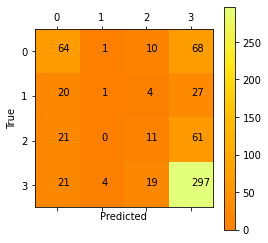

1.Cancer의 정밀도 :  50.79365079365079 %
1.Cancer의 재현율 :  44.75524475524475 %
2.Precancer의 정밀도 :  16.666666666666664 %
2.Precancer의 재현율 :  1.9230769230769231 %
3.Inflammatory의 정밀도 :  25.0 %
3.Inflammatory의 재현율 :  11.827956989247312 %
4.Normal의 정밀도 :  65.56291390728477 %
4.Normal의 재현율 :  87.09677419354838 %
None


KeyboardInterrupt: ignored

In [18]:
optimize(num_iterations=1000000)
